In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [112]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [113]:
train.head(50)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00


In [114]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [115]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [116]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,Doing Justice: A Prosecutor’s Thoughts on Crim...,Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,A Guardian Pick for 2019\nThe People vs. Putin...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [119]:
train.Price = np.log1p(train.Price)

In [120]:
q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3-q1
upper = q3+2.5*iqr
lower = q1-2.5*iqr
x = np.where((train.Price < lower )| (train.Price.values>upper))
train.drop(index = x[0], inplace=True)
train.reset_index(drop=True, inplace=True)

In [121]:
def words(text):
    return(len(str(text).lower().split())/len(str(text)))

def n_unique_word(text):
    return(len(set(str(text).lower().split()))/len(str(text)))

def letter(text):
    return(len(str(text)))

def n_clean_words(text):
    s = [w for w in str(text).split() if w not in stopwords and w not in list(punct)]
    return(len(s)/len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).split() if w in stopwords]
    return(len(s)/len(str(text)))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s)/len(str(text)))

def n_title(text):
    s = [w for w in str(text).split() if w.istitle()]
    return(len(s)/len(str(text)))

def n_Upper(text):
    s = [w for w in str(text).split() if w.isupper()]
    return(len(s)/len(str(text)))

def n_Lower(text):
    s = [w for w in str(text).split() if w.islower()]
    return(len(s)/len(str(text)))

train['Title_unique_word'] = train.Title.apply(lambda x: n_unique_word(x))
test['Title_unique_word'] = test.Title.apply(lambda x: n_unique_word(x))

train['Synopsis_unique_word'] = train.Synopsis.apply(lambda x: n_unique_word(x))
test['Synopsis_unique_word'] = test.Synopsis.apply(lambda x: n_unique_word(x))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_upper_word'] = train.Title.apply(lambda x: n_Upper(x))
test['Title_upper_word'] = test.Title.apply(lambda x: n_Upper(x))

train['Synopsis_upper_word'] = train.Synopsis.apply(lambda x: n_Upper(x))
test['Synopsis_upper_word'] = test.Synopsis.apply(lambda x: n_Upper(x))

train['Title_lower_word'] = train.Title.apply(lambda x: n_Lower(x))
test['Title_lower_word'] = test.Title.apply(lambda x: n_Lower(x))

train['Synopsis_lower_word'] = train.Synopsis.apply(lambda x: n_Lower(x))
test['Synopsis_lower_word'] = test.Synopsis.apply(lambda x: n_Lower(x))

train['Title_n_clean_word'] = train.Title.apply(lambda x: n_clean_words(x))
test['Title_n_clean_word'] = test.Title.apply(lambda x: n_clean_words(x))

train['Synopsis_n_clean_word'] = train.Synopsis.apply(lambda x: n_clean_words(x))
test['Synopsis_n_clean_word'] = test.Synopsis.apply(lambda x: n_clean_words(x))

#train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
#train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

#test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
#test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]

#train['Title_0'] = train.Title_0.apply(lambda x: words(x))
#test['Title_0'] = test.Title_0.apply(lambda x: words(x))

#train['Title_1'] = train.Title_1.apply(lambda x: words(x))
#test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [122]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train.Author = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test.Author = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [123]:
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

train['month'] = train.Edition.str.extract(r"([a-zA-Z]|\s*)\d\d\d\d$")
test['month'] = test.Edition.str.extract(r"([a-zA-Z]|\s*)\d\d\d\d$")

train.Date.fillna(2014, inplace=True)
test.Date.fillna(2014, inplace=True)
train.month.fillna('other', inplace=True)
test.month.fillna('other', inplace=True)

In [124]:
train['Edition_1'] = train.Edition.str.extract(r'(^[a-zA-Z]*),.*')
test['Edition_1'] = test.Edition.str.extract(r'(^[a-zA-Z]*),.*')

In [125]:
train['Edition_2'] = train.Edition.str.extract(r'^.* -*(.*),.*')
test['Edition_2'] = test.Edition.str.extract(r'^.* -*(.*),.*')

In [126]:
train.Edition_2.fillna('other', inplace=True)
test.Edition_2.fillna('other', inplace=True)

In [127]:
t = set(train.Edition_2.value_counts().index).difference(set(test.Edition_2.value_counts().index))
train.Edition_2 = train.Edition_2.apply(lambda x: np.NaN if x in list(t) else x)

In [128]:
train.Edition_2.fillna('other', inplace=True)
test.Edition_2.fillna('other', inplace=True)

In [129]:
train.Edition_1.fillna('Paperback', inplace=True)

In [130]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [131]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [138]:
train['Rating_t'] = train.Ratings.str.extract(r"(^\d+)")
test['Rating_t'] = test.Ratings.str.extract(r"(^\d+)")

In [143]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

#train['Rat_Rev'] = train['Rat_Rev'].apply(lambda x: x/5)
#test['Rat_Rev'] = test['Rat_Rev'].apply(lambda x: x/5)

In [145]:
train.Genre.value_counts()

Action & Adventure (Books)               946
Romance (Books)                          418
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Essay, Letter & Review Writing             1
Biology & Life Sciences                    1
Medicine`                                  1
Engineering Services Exams                 1
Workbooks                                  1
Name: Genre, Length: 345, dtype: int64

In [146]:
test.Genre.value_counts()

Action & Adventure (Books)               236
Romance (Books)                           98
Biographies & Autobiographies (Books)     90
Contemporary Fiction (Books)              69
Crime, Thriller & Mystery (Books)         59
                                        ... 
Hockey                                     1
Children's Language Learning (Books)       1
Religious Studies                          1
Interface Design Programming               1
C# Programming                             1
Name: Genre, Length: 225, dtype: int64

In [147]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [149]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(1,3)
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,4))
z = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,4))
e = tfidf.fit_transform(pd.concat([train.Genre_t, test.Genre_t], axis = 0))

In [150]:
#x = CountVectorizer().fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

In [151]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=80)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(80)])
z = pd.DataFrame(pca.fit_transform(z), columns = [a for a in range(80,160)])
e = pd.DataFrame(pca.fit_transform(e), columns = [a for a in range(160,240)])

In [152]:
np.sum(pca.explained_variance_ratio_)

0.89350086027576

In [153]:
train.shape, test.shape

((6218, 35), (1560, 34))

In [154]:
tr = x.iloc[:6218,:]
te = x.iloc[6218:,:]
te.reset_index(drop = True, inplace=True)

tr_z = z.iloc[:6218,:]
te_z = z.iloc[6218:,:]
te_z.reset_index(drop = True, inplace=True)

tr_e = e.iloc[:6218,:]
te_e = e.iloc[6218:,:]
te_e.reset_index(drop = True, inplace=True)

In [155]:
train = pd.concat([train, tr, tr_z, tr_e], axis = 1)
test = pd.concat([test, te, te_z, te_e], axis = 1)

In [156]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6218, 275), (1560, 274))

In [157]:
train.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [158]:
(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Columns: 269 entries, Author to 239
dtypes: float64(258), int64(2), object(9)
memory usage: 12.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 268 entries, Author to 239
dtypes: float64(257), int64(2), object(9)
memory usage: 3.2+ MB


(None, None)

In [159]:
train.Author = train.Author.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_1 = train.Edition_1.astype('category')
train.Edition_2 = train.Edition_2.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')
train.month = train.month.astype('category')

test.Author = test.Author.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_1 = test.Edition_1.astype('category')
test.Edition_2 = test.Edition_2.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.month = test.month.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')

train.Date = train.Date.apply(lambda x: 2019-int(x))
test.Date = test.Date.apply(lambda x: 2019-int(x))

In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Columns: 269 entries, Author to 239
dtypes: category(6), float64(260), int64(3)
memory usage: 12.6 MB


In [161]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [162]:
train.shape, test.shape

((6218, 268), (1560, 268))

0.3301209576472281 0.6426398962328981


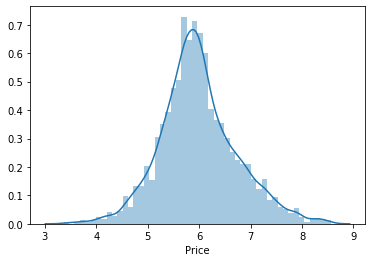

In [163]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

-0.09289632401651765 0.7765571837733471


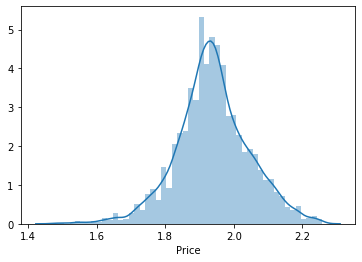

In [164]:
sns.distplot(np.log1p(train_label))
print(np.log1p(train_label).skew(), np.log1p(train_label).kurt())

In [165]:
#train_label = train_label.apply(lambda x: np.log1p(x))

df = pd.DataFrame(pd.concat([train[c], test[c]], axis = 0), columns =train.columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].ftype == 'category:dense' :
        df[c] = le.fit_transform(pd.concat([train[c], test[c]], axis = 0))
    else :
        df[c] = pd.concat([train[c], test[c]], axis = 0)

In [166]:
pd.set_option('max_column',200)
train.head()

,Author,BookCategory,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,Date,month,Edition_1,Edition_2,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
0,other,Action & Adventure,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,3,,Paperback,other,4.0,8.0,32.0,Action & Adventure (Books),0.227455,0.037542,-0.024352,-0.064572,0.022898,0.072930,-0.041041,0.049899,0.041628,0.006550,-0.031027,-0.005882,0.010234,-0.001672,-0.012584,0.012160,0.017918,-0.039930,0.029983,0.034334,-0.048339,-0.011366,0.003532,0.020052,-0.000051,-0.017078,-0.036765,-0.047325,0.022847,0.010353,-0.011375,-0.011345,-0.008136,-0.007928,-0.026571,-0.033230,0.025878,-0.007555,0.009156,-0.023760,-0.007828,-0.005840,0.005060,0.007820,-0.018271,-0.054864,0.018851,-0.015331,-0.027069,-0.031165,0.008642,0.007401,-0.001316,0.008836,-0.034658,0.007054,-0.006763,-0.021618,-0.019190,-0.033617,-0.005634,0.022357,-0.028275,0.025632,-0.014101,0.031833,-0.032656,-0.003380,-0.010975,-0.002429,0.046863,-0.001789,...,-0.002510,-0.000300,0.006472,-0.002471,-0.005944,-0.002166,0.001705,-0.000592,-0.001734,-0.001714,-0.001159,-0.001528,-0.001781,0.002049,-0.000576,-0.006778,0.000593,0.001167,0.001209,0.004386,9.988683e-01,-4.368367e-02,-9.860787e-03,-1.181162e-02,-3.397925e-03,-3.214989e-03,4.723508e-12,4.950528e-03,-5.184606e-03,-4.401092e-03,7.624929e-05,-1.532773e-03,-1.787508e-03,2.700095e-09,-1.791882e-03,-1.042971e-03,-1.283675e-03,1.289704e-04,-2.731189e-04,-1.346894e-03,-8.283218e-04,-4.934114e-06,-2.188481e-04,-1.145757e-04,-4.689975e-04,-8.188523e-04,0.000055,-7.146102e-04,-0.000568,0.001229,-6.436693e-04,-0.000300,-0.000447,-0.000007,-0.000416,-0.000675,-0.000883,-0.000842,-1.226535e-05,-0.000147,-0.000299,-0.000151,-0.000172,-0.000173,-0.000330,-0.000394,-2.140886e-04,0.000019,-0.000468,-0.000332,-0.000003,-0.000294,0.000004,0.000004,-0.000407,-0.000011,-0.000099,-0.000809,-0.000011,-0.000222,-0.000009,-0.000134,-0.000018,-0.000085,-0.000055,0.000060,-0.000070,-0.000189,-0.000118,-0.000201,0.000049,-0.000078,0.000027,-0.000036,-0.000103,-0.000056,-0.000060,0.000027,-0.000171,0.000080
1,Arun Khopkar,"Biographies, Diaries & True Accounts",0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,7,,Paperback,other,3.9,14.0,54.6,Cinema & Broadcast (Books),0.199100,-0.018893,-0.057341,0.026912,0.021262,-0.043496,-0.013129,-0.017458,-0.026629,-0.052659,0.012293,0.041193,-0.001468,0.046545,0.018469,-0.010990,-0.029373,0.031388,0.016104,0.013378,-0.037803,0.025451,-0.005436,-0.011204,-0.017390,-0.002672,-0.013514,-0.021838,-0.021161,-0.012281,0.001046,-0.008286,-0.034872,0.019063,-0.031644,-0.004263,0.003603,-0.043103,-0.043342,0.000209,0.023335,0.012664,-0.004510,0.030340,-0.034926,-0.037250,-0.005221,-0.014182,0.048334,-0.001561,-0.092065,0.034248,-0.001088,-0.018223,0.024508,-0.010352,-0.024282,-0.029719,-0.019646,-0.020552,0.004797,0.032141,-0.051359,-0.037117,-0.002767,-0.004858,0.046918,-0.008300,-0.030134,0.016526,0.030541,-0.003011,...,0.002776,0.001219,-0

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train,test], axis = 0)
df.Author = le.fit_transform(df.Author)
df.Genre_t = le.fit_transform(df.Genre_t)
train.shape, test.shape

((6218, 268), (1560, 268))

In [168]:
train = df.iloc[:6218,:]
test = df.iloc[6218:,:]
test.reset_index(drop=True, inplace=True)

In [171]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6218, 291) (1560, 291)


In [172]:
train.head()

,Author,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,Date,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,...,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,month_other,Edition_1_Flexibound,Edition_1_Hardcover,Edition_1_Paperback,Edition_2_Audiobook,Edition_2_Edge,Edition_2_Edition,Edition_2_Illustrated,Edition_2_Import,Edition_2_Leaf,Edition_2_Paperback,Edition_2_Print,Edition_2_Unabridged,Edition_2_eBook,Edition_2_music,Edition_2_other,Edition_2_set
0,530,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,3,4.0,8.0,32.0,1,0.227455,0.037542,-0.024352,-0.064572,0.022898,0.072930,-0.041041,0.049899,0.041628,0.006550,-0.031027,-0.005882,0.010234,-0.001672,-0.012584,0.012160,0.017918,-0.039930,0.029983,0.034334,-0.048339,-0.011366,0.003532,0.020052,-0.000051,-0.017078,-0.036765,-0.047325,0.022847,0.010353,-0.011375,-0.011345,-0.008136,-0.007928,-0.026571,-0.033230,0.025878,-0.007555,0.009156,-0.023760,-0.007828,-0.005840,0.005060,0.007820,-0.018271,-0.054864,0.018851,-0.015331,-0.027069,-0.031165,0.008642,0.007401,-0.001316,0.008836,-0.034658,0.007054,-0.006763,-0.021618,-0.019190,-0.033617,-0.005634,0.022357,-0.028275,0.025632,-0.014101,0.031833,-0.032656,-0.003380,-0.010975,-0.002429,0.046863,-0.001789,0.040960,0.010237,0.011589,-0.045639,...,4.950528e-03,-5.184606e-03,-4.401092e-03,7.624929e-05,-1.532773e-03,-1.787508e-03,2.700095e-09,-1.791882e-03,-1.042971e-03,-1.283675e-03,1.289704e-04,-2.731189e-04,-1.346894e-03,-8.283218e-04,-4.934114e-06,-2.188481e-04,-1.145757e-04,-4.689975e-04,-8.188523e-04,0.000055,-7.146102e-04,-0.000568,0.001229,-6.436693e-04,-0.000300,-0.000447,-0.000007,-0.000416,-0.000675,-0.000883,-0.000842,-1.226535e-05,-0.000147,-0.000299,-0.000151,-0.000172,-0.000173,-0.000330,-0.000394,-2.140886e-04,0.000019,-0.000468,-0.000332,-0.000003,-0.000294,0.000004,0.000004,-0.000407,-0.000011,-0.000099,-0.000809,-0.000011,-0.000222,-0.000009,-0.000134,-0.000018,-0.000085,-0.000055,0.000060,-0.000070,-0.000189,-0.000118,-0.000201,0.000049,-0.000078,0.000027,-0.000036,-0.000103,-0.000056,-0.000060,0.000027,-0.000171,0.000080,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,36,0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,7,3.9,14.0,54.6,49,0.199100,-0.018893,-0.057341,0.026912,0.021262,-0.043496,-0.013129,-0.017458,-0.026629,-0.052659,0.012293,0.041193,-0.001468,0.046545,0.018469,-0.010990,-0.029373,0.031388,0.016104,0.013378,-0.037803,0.025451,-0.005436,-0.011204,-0.017390,-0.002672,-0.013514,-0.021838,-0.021161,-0.012281,0.001046,-0.008286,-0.034872,0.019063,-0.031644,-0.004263,0.003603,-0.043103,-0.043342,0.000209,0.023335,0.012664,-0.004510,0.030340,-0.034926,-0.037250,-0.005221,-0.014182,0.048334,-0.001561,-0.092065,0.034248,-0.001088,-0.018223,0.024508,-0.010352,-0.024282,-0.029719,-0.

In [173]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [174]:
#from sklearn.preprocessing import MinMaxScaler
#mmx = MinMaxScaler()
#train = pd.DataFrame(mmx.fit_transform(train), columns = train.columns)
#test = pd.DataFrame(mmx.fit_transform(test), columns = test.columns)

In [175]:
train.shape, test.shape

((6218, 291), (1560, 291))

# ML

In [176]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error

In [177]:
score = cross_val_score(xgb.XGBRegressor(), train, train_label, scoring='neg_mean_squared_log_error', cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:52:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:52:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [178]:
np.sqrt(-1*score)

array([0.07989015, 0.07624577, 0.08098175])

In [179]:
param_xgb = {}
param_xgb['learning_rate'] = 0.08
param_xgb['seed'] = 23
param_xgb['eval_metric'] = 'rmse'
param_xgb['objective'] = 'reg:squarederror'

param_lgb = {}
param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.03
param_lgb['seed'] = 23
param_lgb['metric'] = 'rmse'

def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=2018)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=10000,
                             early_stopping_rounds= 200)
            pred.loc[:,i] = best.predict(train, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            f = xgb.DMatrix(train)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=10000, early_stopping_rounds= 200)
            pred.loc[:,i] = best.predict(f, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [180]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:5.09698	test-rmse:5.1116
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.69682	test-rmse:4.71268
[2]	train-rmse:4.32881	test-rmse:4.34513
[3]	train-rmse:3.99062	test-rmse:4.00864
[4]	train-rmse:3.67995	test-rmse:3.69823
[5]	train-rmse:3.3946	test-rmse:3.41489
[6]	train-rmse:3.13248	test-rmse:3.15415
[7]	train-rmse:2.89177	test-rmse:2.91546
[8]	train-rmse:2.67045	test-rmse:2.69491
[9]	train-rmse:2.46734	test-rmse:2.49367
[10]	train-rmse:2.28092	test-rmse:2.30878
[11]	train-rmse:2.10986	test-rmse:2.14018
[12]	train-rmse:1.95278	test-rmse:1.98598
[13]	train-rmse:1.80889	test-rmse:1.84474
[14]	train-rmse:1.67672	test-rmse:1.71467
[15]	train-rmse:1.55593	test-rmse:1.5973
[16]	train-rmse:1.44514	test-rmse:1.48987
[17]	train-rmse:1.34383	test-rmse:1.39255
[18]	train-rmse:1.25127	test-rmse:1.30356
[19]	train-rmse:1.16664	test-rmse:1.22317
[20]	train-rmse:1.08953	test-

[184]	train-rmse:0.139815	test-rmse:0.521373
[185]	train-rmse:0.138901	test-rmse:0.521372
[186]	train-rmse:0.138186	test-rmse:0.52127
[187]	train-rmse:0.137878	test-rmse:0.521196
[188]	train-rmse:0.136678	test-rmse:0.521143
[189]	train-rmse:0.135654	test-rmse:0.521101
[190]	train-rmse:0.134805	test-rmse:0.521153
[191]	train-rmse:0.134286	test-rmse:0.521107
[192]	train-rmse:0.133543	test-rmse:0.521151
[193]	train-rmse:0.132678	test-rmse:0.521157
[194]	train-rmse:0.132329	test-rmse:0.521133
[195]	train-rmse:0.131264	test-rmse:0.520911
[196]	train-rmse:0.130712	test-rmse:0.521005
[197]	train-rmse:0.130151	test-rmse:0.520984
[198]	train-rmse:0.129385	test-rmse:0.521048
[199]	train-rmse:0.129074	test-rmse:0.521076
[200]	train-rmse:0.128544	test-rmse:0.520995
[201]	train-rmse:0.127373	test-rmse:0.521065
[202]	train-rmse:0.126231	test-rmse:0.52103
[203]	train-rmse:0.125357	test-rmse:0.521004
[204]	train-rmse:0.124979	test-rmse:0.521051
[205]	train-rmse:0.124059	test-rmse:0.520922
[206]	train-

[368]	train-rmse:0.050868	test-rmse:0.519993
[369]	train-rmse:0.050575	test-rmse:0.519998
[370]	train-rmse:0.050458	test-rmse:0.519988
[371]	train-rmse:0.050221	test-rmse:0.520011
[372]	train-rmse:0.050045	test-rmse:0.520002
[373]	train-rmse:0.049791	test-rmse:0.520022
[374]	train-rmse:0.049351	test-rmse:0.520006
[375]	train-rmse:0.049197	test-rmse:0.519983
[376]	train-rmse:0.049089	test-rmse:0.519999
[377]	train-rmse:0.049008	test-rmse:0.520013
[378]	train-rmse:0.048713	test-rmse:0.519984
[379]	train-rmse:0.048572	test-rmse:0.519973
[380]	train-rmse:0.048257	test-rmse:0.519962
[381]	train-rmse:0.048043	test-rmse:0.519952
[382]	train-rmse:0.047996	test-rmse:0.519963
[383]	train-rmse:0.047857	test-rmse:0.519943
[384]	train-rmse:0.047507	test-rmse:0.519937
[385]	train-rmse:0.047149	test-rmse:0.519923
[386]	train-rmse:0.047013	test-rmse:0.519935
[387]	train-rmse:0.046854	test-rmse:0.51996
[388]	train-rmse:0.04672	test-rmse:0.519964
[389]	train-rmse:0.046583	test-rmse:0.519957
[390]	train-

[551]	train-rmse:0.025509	test-rmse:0.519872
[552]	train-rmse:0.025375	test-rmse:0.519878
[553]	train-rmse:0.025312	test-rmse:0.519862
[554]	train-rmse:0.025284	test-rmse:0.519856
[555]	train-rmse:0.025148	test-rmse:0.51985
[556]	train-rmse:0.02505	test-rmse:0.519848
[557]	train-rmse:0.02499	test-rmse:0.519844
[558]	train-rmse:0.024842	test-rmse:0.519845
[559]	train-rmse:0.024775	test-rmse:0.519841
[560]	train-rmse:0.024577	test-rmse:0.519859
[561]	train-rmse:0.024512	test-rmse:0.519856
[562]	train-rmse:0.024472	test-rmse:0.519867
[563]	train-rmse:0.024438	test-rmse:0.519866
[564]	train-rmse:0.024398	test-rmse:0.519874
[565]	train-rmse:0.024315	test-rmse:0.519871
[566]	train-rmse:0.024133	test-rmse:0.519893
[567]	train-rmse:0.024095	test-rmse:0.5199
[568]	train-rmse:0.02404	test-rmse:0.519895
[569]	train-rmse:0.023949	test-rmse:0.519909
[570]	train-rmse:0.023878	test-rmse:0.519903
[571]	train-rmse:0.023836	test-rmse:0.519899
[572]	train-rmse:0.023778	test-rmse:0.519887
[573]	train-rmse

[122]	train-rmse:0.205968	test-rmse:0.516966
[123]	train-rmse:0.204779	test-rmse:0.517079
[124]	train-rmse:0.203462	test-rmse:0.516943
[125]	train-rmse:0.201539	test-rmse:0.516893
[126]	train-rmse:0.200735	test-rmse:0.516778
[127]	train-rmse:0.198555	test-rmse:0.516735
[128]	train-rmse:0.197416	test-rmse:0.516612
[129]	train-rmse:0.196209	test-rmse:0.516606
[130]	train-rmse:0.19549	test-rmse:0.516522
[131]	train-rmse:0.193465	test-rmse:0.516586
[132]	train-rmse:0.19271	test-rmse:0.51651
[133]	train-rmse:0.190894	test-rmse:0.516396
[134]	train-rmse:0.189409	test-rmse:0.516338
[135]	train-rmse:0.188738	test-rmse:0.51624
[136]	train-rmse:0.188257	test-rmse:0.516161
[137]	train-rmse:0.187137	test-rmse:0.516167
[138]	train-rmse:0.185524	test-rmse:0.515881
[139]	train-rmse:0.183777	test-rmse:0.515688
[140]	train-rmse:0.182473	test-rmse:0.5157
[141]	train-rmse:0.181338	test-rmse:0.515552
[142]	train-rmse:0.181152	test-rmse:0.515529
[143]	train-rmse:0.179694	test-rmse:0.51548
[144]	train-rmse:

[306]	train-rmse:0.069861	test-rmse:0.511727
[307]	train-rmse:0.069708	test-rmse:0.511702
[308]	train-rmse:0.069307	test-rmse:0.511703
[309]	train-rmse:0.068803	test-rmse:0.511715
[310]	train-rmse:0.068504	test-rmse:0.511735
[311]	train-rmse:0.068194	test-rmse:0.511724
[312]	train-rmse:0.06808	test-rmse:0.511721
[313]	train-rmse:0.067743	test-rmse:0.511712
[314]	train-rmse:0.067557	test-rmse:0.511703
[315]	train-rmse:0.066976	test-rmse:0.511717
[316]	train-rmse:0.0668	test-rmse:0.51176
[317]	train-rmse:0.066431	test-rmse:0.511755
[318]	train-rmse:0.066078	test-rmse:0.511733
[319]	train-rmse:0.065849	test-rmse:0.511716
[320]	train-rmse:0.065715	test-rmse:0.511731
[321]	train-rmse:0.065438	test-rmse:0.511712
[322]	train-rmse:0.064946	test-rmse:0.511664
[323]	train-rmse:0.064443	test-rmse:0.511669
[324]	train-rmse:0.064128	test-rmse:0.511692
[325]	train-rmse:0.064002	test-rmse:0.51169
[326]	train-rmse:0.063653	test-rmse:0.511633
[327]	train-rmse:0.063238	test-rmse:0.511599
[328]	train-rms

[489]	train-rmse:0.033136	test-rmse:0.510818
[490]	train-rmse:0.032994	test-rmse:0.510823
[491]	train-rmse:0.032875	test-rmse:0.510831
[492]	train-rmse:0.032792	test-rmse:0.510835
[493]	train-rmse:0.032681	test-rmse:0.510844
[494]	train-rmse:0.032583	test-rmse:0.510845
[495]	train-rmse:0.032489	test-rmse:0.51085
[496]	train-rmse:0.032411	test-rmse:0.510827
[497]	train-rmse:0.032359	test-rmse:0.510835
[498]	train-rmse:0.032222	test-rmse:0.510828
[499]	train-rmse:0.032144	test-rmse:0.510837
[500]	train-rmse:0.032082	test-rmse:0.510819
[501]	train-rmse:0.032045	test-rmse:0.510832
[502]	train-rmse:0.031903	test-rmse:0.510823
[503]	train-rmse:0.031867	test-rmse:0.51081
[504]	train-rmse:0.031823	test-rmse:0.510795
[505]	train-rmse:0.031768	test-rmse:0.510791
[506]	train-rmse:0.031707	test-rmse:0.510784
[507]	train-rmse:0.031572	test-rmse:0.510786
[508]	train-rmse:0.031458	test-rmse:0.510789
[509]	train-rmse:0.031432	test-rmse:0.510784
[510]	train-rmse:0.031374	test-rmse:0.510791
[511]	train-

[672]	train-rmse:0.022166	test-rmse:0.51068
[673]	train-rmse:0.022097	test-rmse:0.510686
[674]	train-rmse:0.022072	test-rmse:0.510683
[675]	train-rmse:0.022022	test-rmse:0.51069
[676]	train-rmse:0.022001	test-rmse:0.51069
[677]	train-rmse:0.021991	test-rmse:0.510693
[678]	train-rmse:0.021943	test-rmse:0.510706
[679]	train-rmse:0.021935	test-rmse:0.510708
[680]	train-rmse:0.021921	test-rmse:0.510707
[681]	train-rmse:0.021853	test-rmse:0.510706
[682]	train-rmse:0.02182	test-rmse:0.510707
[683]	train-rmse:0.021799	test-rmse:0.510709
[684]	train-rmse:0.02174	test-rmse:0.510719
[685]	train-rmse:0.021677	test-rmse:0.510726
[686]	train-rmse:0.021651	test-rmse:0.510721
[687]	train-rmse:0.021601	test-rmse:0.510719
[688]	train-rmse:0.021566	test-rmse:0.51072
[689]	train-rmse:0.021557	test-rmse:0.510723
[690]	train-rmse:0.021517	test-rmse:0.510723
[691]	train-rmse:0.021482	test-rmse:0.510727
[692]	train-rmse:0.021445	test-rmse:0.510738
[693]	train-rmse:0.021424	test-rmse:0.510736
[694]	train-rmse

[27]	train-rmse:0.713911	test-rmse:0.784093
[28]	train-rmse:0.6776	test-rmse:0.753259
[29]	train-rmse:0.644889	test-rmse:0.726501
[30]	train-rmse:0.615785	test-rmse:0.702252
[31]	train-rmse:0.588621	test-rmse:0.681207
[32]	train-rmse:0.564979	test-rmse:0.662294
[33]	train-rmse:0.544152	test-rmse:0.646387
[34]	train-rmse:0.524253	test-rmse:0.631963
[35]	train-rmse:0.506728	test-rmse:0.619698
[36]	train-rmse:0.489848	test-rmse:0.608101
[37]	train-rmse:0.476901	test-rmse:0.598601
[38]	train-rmse:0.464221	test-rmse:0.590074
[39]	train-rmse:0.451826	test-rmse:0.582547
[40]	train-rmse:0.440483	test-rmse:0.576003
[41]	train-rmse:0.432087	test-rmse:0.570694
[42]	train-rmse:0.42207	test-rmse:0.565216
[43]	train-rmse:0.413273	test-rmse:0.560404
[44]	train-rmse:0.405196	test-rmse:0.556378
[45]	train-rmse:0.397672	test-rmse:0.553043
[46]	train-rmse:0.392574	test-rmse:0.550041
[47]	train-rmse:0.386895	test-rmse:0.547103
[48]	train-rmse:0.381181	test-rmse:0.544729
[49]	train-rmse:0.375699	test-rmse:

[212]	train-rmse:0.127841	test-rmse:0.506513
[213]	train-rmse:0.127117	test-rmse:0.506362
[214]	train-rmse:0.126031	test-rmse:0.506203
[215]	train-rmse:0.125078	test-rmse:0.506102
[216]	train-rmse:0.124378	test-rmse:0.506072
[217]	train-rmse:0.123585	test-rmse:0.505967
[218]	train-rmse:0.123046	test-rmse:0.505951
[219]	train-rmse:0.122411	test-rmse:0.505801
[220]	train-rmse:0.121941	test-rmse:0.505747
[221]	train-rmse:0.121002	test-rmse:0.505681
[222]	train-rmse:0.120587	test-rmse:0.505715
[223]	train-rmse:0.119938	test-rmse:0.505718
[224]	train-rmse:0.118875	test-rmse:0.505598
[225]	train-rmse:0.118074	test-rmse:0.505598
[226]	train-rmse:0.117473	test-rmse:0.505585
[227]	train-rmse:0.116881	test-rmse:0.505535
[228]	train-rmse:0.11548	test-rmse:0.505627
[229]	train-rmse:0.114247	test-rmse:0.50559
[230]	train-rmse:0.113182	test-rmse:0.505608
[231]	train-rmse:0.112552	test-rmse:0.505549
[232]	train-rmse:0.112461	test-rmse:0.505562
[233]	train-rmse:0.111932	test-rmse:0.505531
[234]	train-

[396]	train-rmse:0.051507	test-rmse:0.504142
[397]	train-rmse:0.051256	test-rmse:0.504136
[398]	train-rmse:0.050931	test-rmse:0.504154
[399]	train-rmse:0.050689	test-rmse:0.504158
[400]	train-rmse:0.050505	test-rmse:0.504144
[401]	train-rmse:0.050334	test-rmse:0.504179
[402]	train-rmse:0.050068	test-rmse:0.5042
[403]	train-rmse:0.049829	test-rmse:0.504232
[404]	train-rmse:0.04967	test-rmse:0.504229
[405]	train-rmse:0.04939	test-rmse:0.504233
[406]	train-rmse:0.049173	test-rmse:0.504234
[407]	train-rmse:0.048907	test-rmse:0.504227
[408]	train-rmse:0.048764	test-rmse:0.504233
[409]	train-rmse:0.048545	test-rmse:0.504245
[410]	train-rmse:0.04839	test-rmse:0.504245
[411]	train-rmse:0.048196	test-rmse:0.504265
[412]	train-rmse:0.047874	test-rmse:0.504244
[413]	train-rmse:0.04769	test-rmse:0.504254
[414]	train-rmse:0.047411	test-rmse:0.504251
[415]	train-rmse:0.047242	test-rmse:0.504252
[416]	train-rmse:0.046982	test-rmse:0.504215
[417]	train-rmse:0.046742	test-rmse:0.504189
[418]	train-rmse

[579]	train-rmse:0.028364	test-rmse:0.504446
[580]	train-rmse:0.028311	test-rmse:0.504446
[581]	train-rmse:0.028241	test-rmse:0.504456
[582]	train-rmse:0.028174	test-rmse:0.504458
[583]	train-rmse:0.02815	test-rmse:0.504453
[584]	train-rmse:0.028118	test-rmse:0.504451
[585]	train-rmse:0.028101	test-rmse:0.504451
[586]	train-rmse:0.028086	test-rmse:0.504448
[587]	train-rmse:0.028052	test-rmse:0.504444
[588]	train-rmse:0.027972	test-rmse:0.504422
Stopping. Best iteration:
[388]	train-rmse:0.053457	test-rmse:0.503999



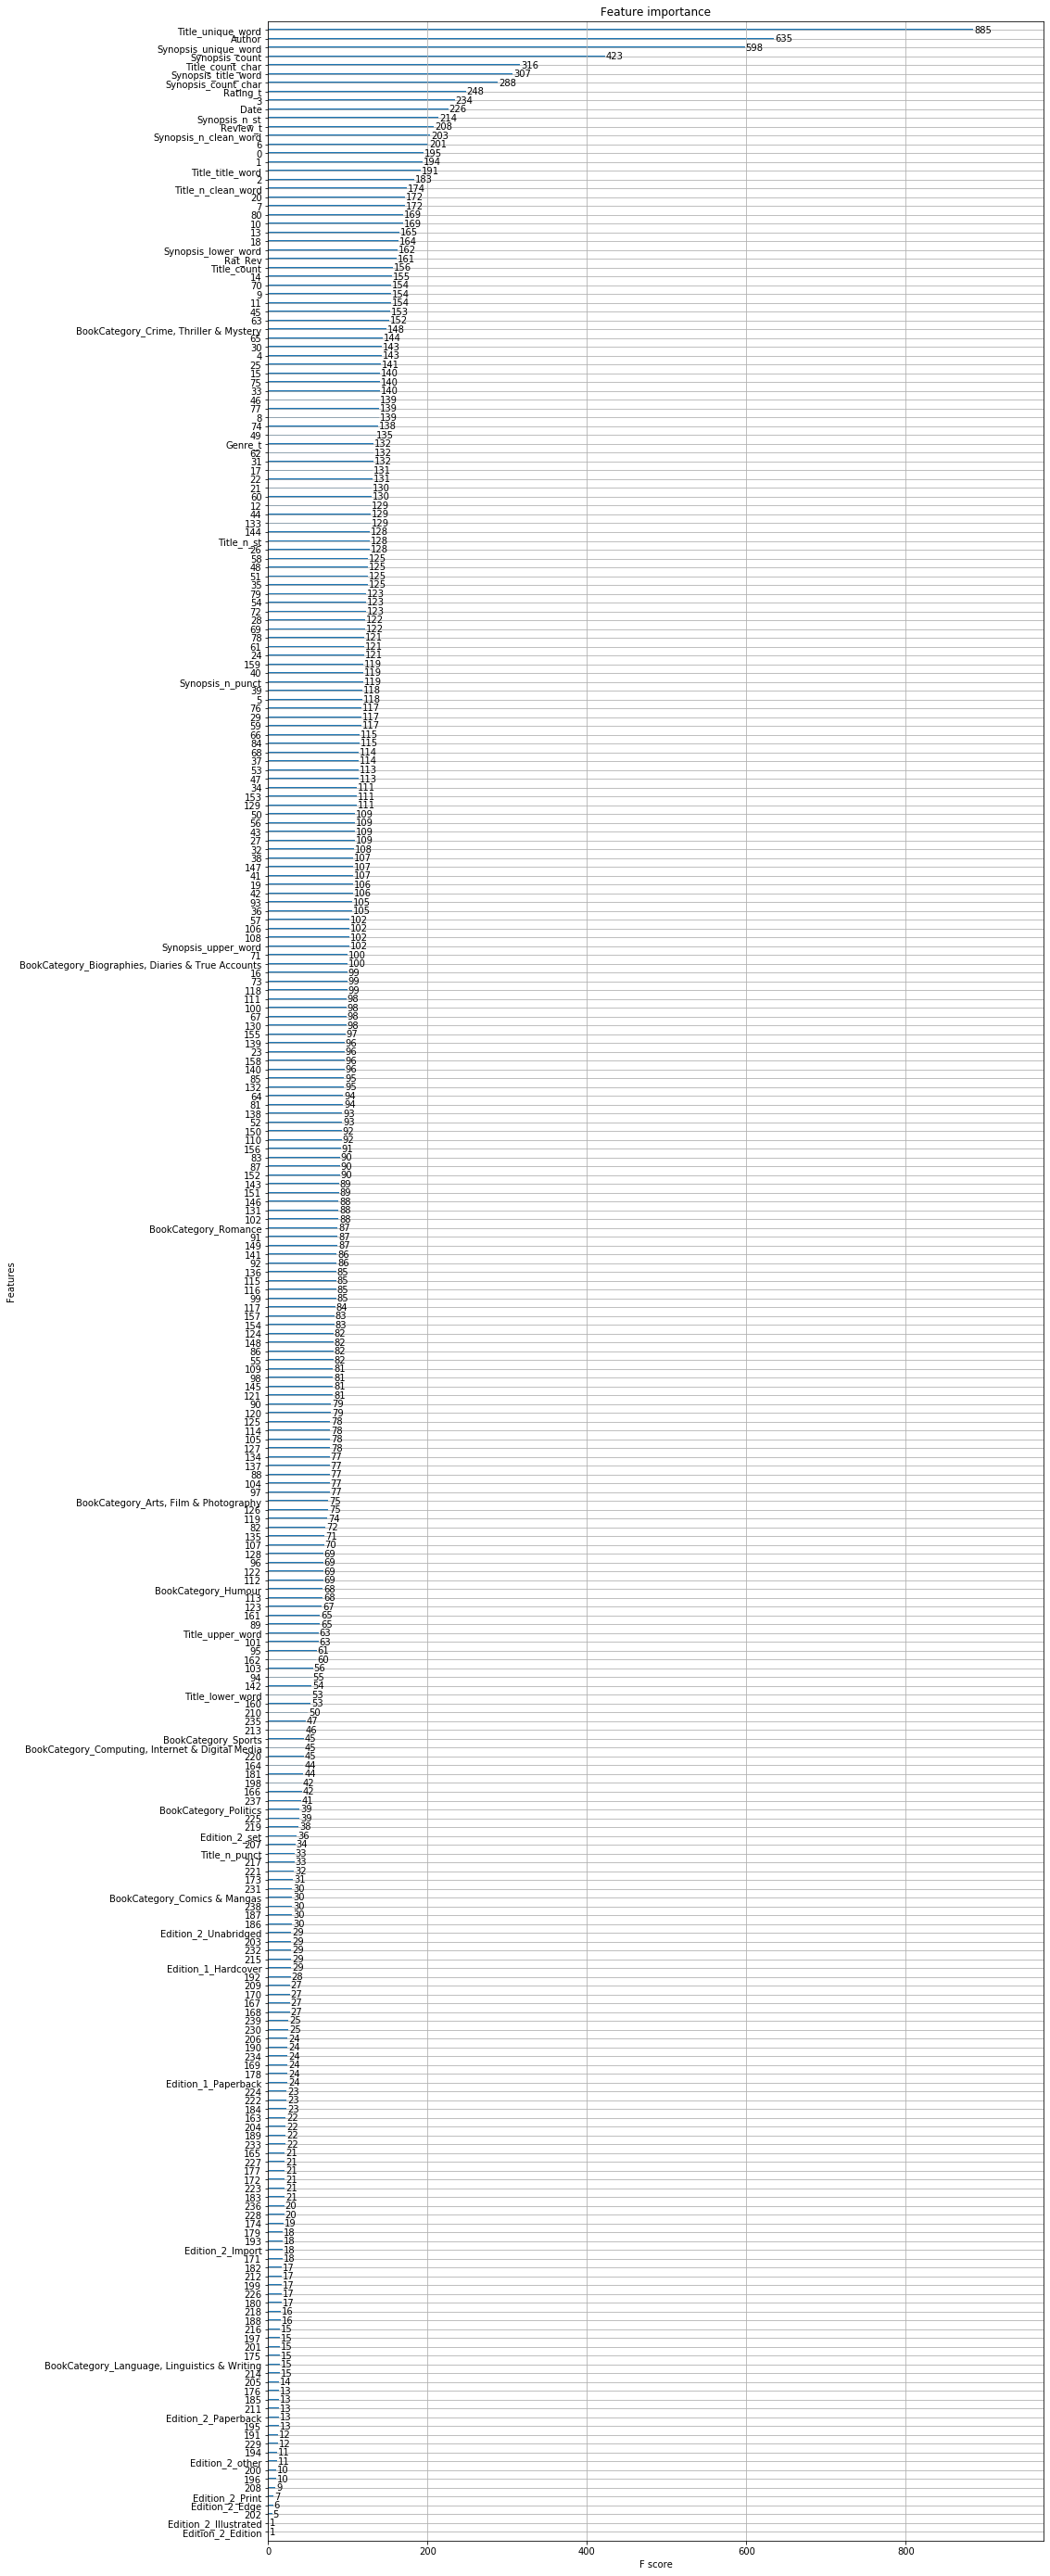

In [182]:
fig, ax  = plt.subplots(1,1, figsize=(15,50))
xgb.plot_importance(model, ax = ax)

In [183]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.737807	valid_1's rmse: 0.741736
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.729817	valid_1's rmse: 0.735425
[3]	training's rmse: 0.722201	valid_1's rmse: 0.729385
[4]	training's rmse: 0.714933	valid_1's rmse: 0.723526
[5]	training's rmse: 0.707895	valid_1's rmse: 0.718123
[6]	training's rmse: 0.701126	valid_1's rmse: 0.713121
[7]	training's rmse: 0.694657	valid_1's rmse: 0.708056
[8]	training's rmse: 0.688319	valid_1's rmse: 0.703286
[9]	training's rmse: 0.682033	valid_1's rmse: 0.698327
[10]	training's rmse: 0.675736	valid_1's rmse: 0.693568
[11]	training's rmse: 0.669737	valid_1's rmse: 0.688972
[12]	training's rmse: 0.663629	valid_1's rmse: 0.684753
[13]	training's rmse: 0.657899	valid_1's rmse: 0.680637
[14]	training's rmse: 0.652205	valid_1's rmse: 0.676406
[15]	training's rmse: 0.647076	valid_1's rmse: 0.67273
[16]	training's rmse: 0.641807	valid_1's rmse: 0.668936
[17]	training's rmse: 0.636738	valid_1's rmse: 0.66

[148]	training's rmse: 0.35625	valid_1's rmse: 0.541589
[149]	training's rmse: 0.355181	valid_1's rmse: 0.541361
[150]	training's rmse: 0.354134	valid_1's rmse: 0.541251
[151]	training's rmse: 0.353023	valid_1's rmse: 0.541062
[152]	training's rmse: 0.351885	valid_1's rmse: 0.540635
[153]	training's rmse: 0.350771	valid_1's rmse: 0.540494
[154]	training's rmse: 0.34974	valid_1's rmse: 0.540456
[155]	training's rmse: 0.348601	valid_1's rmse: 0.540389
[156]	training's rmse: 0.347562	valid_1's rmse: 0.54019
[157]	training's rmse: 0.346555	valid_1's rmse: 0.539899
[158]	training's rmse: 0.345441	valid_1's rmse: 0.53963
[159]	training's rmse: 0.344337	valid_1's rmse: 0.539541
[160]	training's rmse: 0.343247	valid_1's rmse: 0.539243
[161]	training's rmse: 0.342281	valid_1's rmse: 0.539094
[162]	training's rmse: 0.341198	valid_1's rmse: 0.538823
[163]	training's rmse: 0.34012	valid_1's rmse: 0.538671
[164]	training's rmse: 0.339154	valid_1's rmse: 0.538505
[165]	training's rmse: 0.338088	vali

[293]	training's rmse: 0.239655	valid_1's rmse: 0.522622
[294]	training's rmse: 0.239013	valid_1's rmse: 0.522505
[295]	training's rmse: 0.238565	valid_1's rmse: 0.522389
[296]	training's rmse: 0.238037	valid_1's rmse: 0.522278
[297]	training's rmse: 0.237412	valid_1's rmse: 0.522104
[298]	training's rmse: 0.23682	valid_1's rmse: 0.52206
[299]	training's rmse: 0.236184	valid_1's rmse: 0.521987
[300]	training's rmse: 0.235619	valid_1's rmse: 0.521959
[301]	training's rmse: 0.23517	valid_1's rmse: 0.521874
[302]	training's rmse: 0.234595	valid_1's rmse: 0.521867
[303]	training's rmse: 0.234038	valid_1's rmse: 0.521773
[304]	training's rmse: 0.233529	valid_1's rmse: 0.52177
[305]	training's rmse: 0.233004	valid_1's rmse: 0.521752
[306]	training's rmse: 0.232443	valid_1's rmse: 0.521763
[307]	training's rmse: 0.231805	valid_1's rmse: 0.521658
[308]	training's rmse: 0.231238	valid_1's rmse: 0.521564
[309]	training's rmse: 0.230633	valid_1's rmse: 0.521492
[310]	training's rmse: 0.230126	val

[441]	training's rmse: 0.17236	valid_1's rmse: 0.51778
[442]	training's rmse: 0.171988	valid_1's rmse: 0.517696
[443]	training's rmse: 0.171634	valid_1's rmse: 0.517659
[444]	training's rmse: 0.171256	valid_1's rmse: 0.517649
[445]	training's rmse: 0.170891	valid_1's rmse: 0.51766
[446]	training's rmse: 0.170576	valid_1's rmse: 0.517644
[447]	training's rmse: 0.170239	valid_1's rmse: 0.517567
[448]	training's rmse: 0.169884	valid_1's rmse: 0.517519
[449]	training's rmse: 0.169516	valid_1's rmse: 0.517456
[450]	training's rmse: 0.169108	valid_1's rmse: 0.517435
[451]	training's rmse: 0.168763	valid_1's rmse: 0.517418
[452]	training's rmse: 0.168372	valid_1's rmse: 0.517373
[453]	training's rmse: 0.16808	valid_1's rmse: 0.517266
[454]	training's rmse: 0.167767	valid_1's rmse: 0.5172
[455]	training's rmse: 0.16739	valid_1's rmse: 0.517155
[456]	training's rmse: 0.167071	valid_1's rmse: 0.517181
[457]	training's rmse: 0.166694	valid_1's rmse: 0.51715
[458]	training's rmse: 0.16629	valid_1'

[585]	training's rmse: 0.127792	valid_1's rmse: 0.515012
[586]	training's rmse: 0.127547	valid_1's rmse: 0.514963
[587]	training's rmse: 0.127326	valid_1's rmse: 0.51493
[588]	training's rmse: 0.127015	valid_1's rmse: 0.514929
[589]	training's rmse: 0.126786	valid_1's rmse: 0.514915
[590]	training's rmse: 0.126537	valid_1's rmse: 0.514874
[591]	training's rmse: 0.126276	valid_1's rmse: 0.514867
[592]	training's rmse: 0.126061	valid_1's rmse: 0.514851
[593]	training's rmse: 0.125814	valid_1's rmse: 0.514872
[594]	training's rmse: 0.125553	valid_1's rmse: 0.514888
[595]	training's rmse: 0.125352	valid_1's rmse: 0.514856
[596]	training's rmse: 0.125164	valid_1's rmse: 0.514885
[597]	training's rmse: 0.124868	valid_1's rmse: 0.514822
[598]	training's rmse: 0.124626	valid_1's rmse: 0.514819
[599]	training's rmse: 0.12432	valid_1's rmse: 0.514798
[600]	training's rmse: 0.12407	valid_1's rmse: 0.514746
[601]	training's rmse: 0.123771	valid_1's rmse: 0.514711
[602]	training's rmse: 0.123513	va

[732]	training's rmse: 0.0961044	valid_1's rmse: 0.513059
[733]	training's rmse: 0.0959319	valid_1's rmse: 0.513051
[734]	training's rmse: 0.0957562	valid_1's rmse: 0.513052
[735]	training's rmse: 0.0956039	valid_1's rmse: 0.513017
[736]	training's rmse: 0.0954557	valid_1's rmse: 0.513029
[737]	training's rmse: 0.0952902	valid_1's rmse: 0.513028
[738]	training's rmse: 0.0950971	valid_1's rmse: 0.512992
[739]	training's rmse: 0.0949199	valid_1's rmse: 0.512973
[740]	training's rmse: 0.0947707	valid_1's rmse: 0.512962
[741]	training's rmse: 0.0946062	valid_1's rmse: 0.512968
[742]	training's rmse: 0.0944137	valid_1's rmse: 0.512962
[743]	training's rmse: 0.0942649	valid_1's rmse: 0.512948
[744]	training's rmse: 0.094077	valid_1's rmse: 0.512938
[745]	training's rmse: 0.0938763	valid_1's rmse: 0.512929
[746]	training's rmse: 0.0937171	valid_1's rmse: 0.512917
[747]	training's rmse: 0.0935303	valid_1's rmse: 0.512895
[748]	training's rmse: 0.0933639	valid_1's rmse: 0.512888
[749]	training'

[875]	training's rmse: 0.0748849	valid_1's rmse: 0.512585
[876]	training's rmse: 0.0747608	valid_1's rmse: 0.512589
[877]	training's rmse: 0.0746419	valid_1's rmse: 0.5126
[878]	training's rmse: 0.0745309	valid_1's rmse: 0.512578
[879]	training's rmse: 0.0744021	valid_1's rmse: 0.512576
[880]	training's rmse: 0.0742703	valid_1's rmse: 0.512585
[881]	training's rmse: 0.0741347	valid_1's rmse: 0.512607
[882]	training's rmse: 0.0740255	valid_1's rmse: 0.51262
[883]	training's rmse: 0.0739084	valid_1's rmse: 0.512616
[884]	training's rmse: 0.073781	valid_1's rmse: 0.512595
[885]	training's rmse: 0.0736452	valid_1's rmse: 0.512589
[886]	training's rmse: 0.0735192	valid_1's rmse: 0.512592
[887]	training's rmse: 0.0733849	valid_1's rmse: 0.512586
[888]	training's rmse: 0.0732779	valid_1's rmse: 0.512572
[889]	training's rmse: 0.0731601	valid_1's rmse: 0.512555
[890]	training's rmse: 0.073032	valid_1's rmse: 0.512549
[891]	training's rmse: 0.0729431	valid_1's rmse: 0.512551
[892]	training's rm

[1019]	training's rmse: 0.0592824	valid_1's rmse: 0.512423
[1020]	training's rmse: 0.0592012	valid_1's rmse: 0.512423
[1021]	training's rmse: 0.0590961	valid_1's rmse: 0.512422
[1022]	training's rmse: 0.0590127	valid_1's rmse: 0.512406
[1023]	training's rmse: 0.058923	valid_1's rmse: 0.512407
[1024]	training's rmse: 0.058842	valid_1's rmse: 0.512413
[1025]	training's rmse: 0.0587647	valid_1's rmse: 0.512418
[1026]	training's rmse: 0.0586403	valid_1's rmse: 0.512414
[1027]	training's rmse: 0.0585617	valid_1's rmse: 0.512417
[1028]	training's rmse: 0.0584444	valid_1's rmse: 0.512423
[1029]	training's rmse: 0.0583358	valid_1's rmse: 0.512399
[1030]	training's rmse: 0.0582507	valid_1's rmse: 0.512392
[1031]	training's rmse: 0.0581677	valid_1's rmse: 0.512397
[1032]	training's rmse: 0.0581091	valid_1's rmse: 0.512395
[1033]	training's rmse: 0.0580235	valid_1's rmse: 0.512391
[1034]	training's rmse: 0.0579375	valid_1's rmse: 0.512393
[1035]	training's rmse: 0.0578462	valid_1's rmse: 0.512396

[1160]	training's rmse: 0.0482906	valid_1's rmse: 0.512258
[1161]	training's rmse: 0.048244	valid_1's rmse: 0.512256
[1162]	training's rmse: 0.0481826	valid_1's rmse: 0.512261
[1163]	training's rmse: 0.0481026	valid_1's rmse: 0.512266
[1164]	training's rmse: 0.0480401	valid_1's rmse: 0.512275
[1165]	training's rmse: 0.0479892	valid_1's rmse: 0.512272
[1166]	training's rmse: 0.0479244	valid_1's rmse: 0.512261
[1167]	training's rmse: 0.047872	valid_1's rmse: 0.512263
[1168]	training's rmse: 0.0478187	valid_1's rmse: 0.512261
[1169]	training's rmse: 0.0477421	valid_1's rmse: 0.512268
[1170]	training's rmse: 0.0476844	valid_1's rmse: 0.512256
[1171]	training's rmse: 0.0476361	valid_1's rmse: 0.512257
[1172]	training's rmse: 0.0475814	valid_1's rmse: 0.512256
[1173]	training's rmse: 0.0475243	valid_1's rmse: 0.512253
[1174]	training's rmse: 0.0474715	valid_1's rmse: 0.512254
[1175]	training's rmse: 0.0474014	valid_1's rmse: 0.512242
[1176]	training's rmse: 0.0473371	valid_1's rmse: 0.51223


[1302]	training's rmse: 0.0397402	valid_1's rmse: 0.512159
[1303]	training's rmse: 0.0397006	valid_1's rmse: 0.512155
[1304]	training's rmse: 0.0396519	valid_1's rmse: 0.512149
[1305]	training's rmse: 0.0395846	valid_1's rmse: 0.51214
[1306]	training's rmse: 0.0395433	valid_1's rmse: 0.512146
[1307]	training's rmse: 0.0394795	valid_1's rmse: 0.512136
[1308]	training's rmse: 0.0394319	valid_1's rmse: 0.512137
[1309]	training's rmse: 0.0393838	valid_1's rmse: 0.512134
[1310]	training's rmse: 0.0393463	valid_1's rmse: 0.512138
[1311]	training's rmse: 0.0392927	valid_1's rmse: 0.512127
[1312]	training's rmse: 0.039234	valid_1's rmse: 0.512125
[1313]	training's rmse: 0.0391796	valid_1's rmse: 0.512116
[1314]	training's rmse: 0.0391156	valid_1's rmse: 0.512123
[1315]	training's rmse: 0.0390747	valid_1's rmse: 0.512118
[1316]	training's rmse: 0.0390318	valid_1's rmse: 0.512116
[1317]	training's rmse: 0.0389908	valid_1's rmse: 0.512121
[1318]	training's rmse: 0.0389609	valid_1's rmse: 0.512117

[1443]	training's rmse: 0.0337142	valid_1's rmse: 0.512107
[1444]	training's rmse: 0.0336668	valid_1's rmse: 0.512103
[1445]	training's rmse: 0.0336405	valid_1's rmse: 0.512103
[1446]	training's rmse: 0.0336062	valid_1's rmse: 0.512108
[1447]	training's rmse: 0.0335767	valid_1's rmse: 0.512107
[1448]	training's rmse: 0.0335515	valid_1's rmse: 0.512109
[1449]	training's rmse: 0.0335277	valid_1's rmse: 0.51211
[1450]	training's rmse: 0.0334906	valid_1's rmse: 0.512113
[1451]	training's rmse: 0.0334648	valid_1's rmse: 0.512117
[1452]	training's rmse: 0.0334373	valid_1's rmse: 0.512111
[1453]	training's rmse: 0.0334082	valid_1's rmse: 0.512113
[1454]	training's rmse: 0.0333843	valid_1's rmse: 0.51211
[1455]	training's rmse: 0.0333642	valid_1's rmse: 0.51211
[1456]	training's rmse: 0.033326	valid_1's rmse: 0.512108
[1457]	training's rmse: 0.0333006	valid_1's rmse: 0.512101
[1458]	training's rmse: 0.0332714	valid_1's rmse: 0.512102
[1459]	training's rmse: 0.0332436	valid_1's rmse: 0.512107
[

[1584]	training's rmse: 0.0295533	valid_1's rmse: 0.512063
[1585]	training's rmse: 0.0295245	valid_1's rmse: 0.512064
[1586]	training's rmse: 0.0294977	valid_1's rmse: 0.512067
[1587]	training's rmse: 0.0294809	valid_1's rmse: 0.512065
[1588]	training's rmse: 0.0294565	valid_1's rmse: 0.512064
[1589]	training's rmse: 0.0294393	valid_1's rmse: 0.512059
[1590]	training's rmse: 0.0294138	valid_1's rmse: 0.512054
[1591]	training's rmse: 0.0293707	valid_1's rmse: 0.512051
[1592]	training's rmse: 0.0293281	valid_1's rmse: 0.512052
[1593]	training's rmse: 0.0292944	valid_1's rmse: 0.512058
[1594]	training's rmse: 0.0292535	valid_1's rmse: 0.512059
[1595]	training's rmse: 0.0292263	valid_1's rmse: 0.51206
[1596]	training's rmse: 0.029202	valid_1's rmse: 0.512053
[1597]	training's rmse: 0.0291729	valid_1's rmse: 0.512055
[1598]	training's rmse: 0.0291208	valid_1's rmse: 0.512065
[1599]	training's rmse: 0.02909	valid_1's rmse: 0.512066
[1600]	training's rmse: 0.0290735	valid_1's rmse: 0.512062
[

[1724]	training's rmse: 0.0262077	valid_1's rmse: 0.51197
[1725]	training's rmse: 0.0261867	valid_1's rmse: 0.511968
[1726]	training's rmse: 0.0261626	valid_1's rmse: 0.511968
[1727]	training's rmse: 0.0261383	valid_1's rmse: 0.511963
[1728]	training's rmse: 0.0261243	valid_1's rmse: 0.511966
[1729]	training's rmse: 0.0261028	valid_1's rmse: 0.511965
[1730]	training's rmse: 0.0260757	valid_1's rmse: 0.511969
[1731]	training's rmse: 0.0260653	valid_1's rmse: 0.511971
[1732]	training's rmse: 0.0260444	valid_1's rmse: 0.511975
[1733]	training's rmse: 0.0260171	valid_1's rmse: 0.511983
[1734]	training's rmse: 0.0259937	valid_1's rmse: 0.511983
[1735]	training's rmse: 0.0259742	valid_1's rmse: 0.511981
[1736]	training's rmse: 0.0259539	valid_1's rmse: 0.511978
[1737]	training's rmse: 0.0259404	valid_1's rmse: 0.51198
[1738]	training's rmse: 0.0259079	valid_1's rmse: 0.511981
[1739]	training's rmse: 0.0258921	valid_1's rmse: 0.511983
[1740]	training's rmse: 0.0258715	valid_1's rmse: 0.511983

[1864]	training's rmse: 0.0235955	valid_1's rmse: 0.511937
[1865]	training's rmse: 0.023584	valid_1's rmse: 0.511935
[1866]	training's rmse: 0.0235715	valid_1's rmse: 0.511936
[1867]	training's rmse: 0.0235491	valid_1's rmse: 0.511932
[1868]	training's rmse: 0.0235311	valid_1's rmse: 0.511933
[1869]	training's rmse: 0.02351	valid_1's rmse: 0.511932
[1870]	training's rmse: 0.0234916	valid_1's rmse: 0.511928
[1871]	training's rmse: 0.023465	valid_1's rmse: 0.511925
[1872]	training's rmse: 0.0234499	valid_1's rmse: 0.511926
[1873]	training's rmse: 0.0234366	valid_1's rmse: 0.511928
[1874]	training's rmse: 0.0234234	valid_1's rmse: 0.511926
[1875]	training's rmse: 0.0234035	valid_1's rmse: 0.511926
[1876]	training's rmse: 0.0233852	valid_1's rmse: 0.511924
[1877]	training's rmse: 0.0233684	valid_1's rmse: 0.511922
[1878]	training's rmse: 0.0233581	valid_1's rmse: 0.511923
[1879]	training's rmse: 0.0233414	valid_1's rmse: 0.511921
[1880]	training's rmse: 0.0233266	valid_1's rmse: 0.511922
[

[2006]	training's rmse: 0.0214014	valid_1's rmse: 0.511861
[2007]	training's rmse: 0.0213901	valid_1's rmse: 0.511857
[2008]	training's rmse: 0.0213736	valid_1's rmse: 0.511856
[2009]	training's rmse: 0.0213603	valid_1's rmse: 0.511856
[2010]	training's rmse: 0.0213457	valid_1's rmse: 0.511853
[2011]	training's rmse: 0.0213332	valid_1's rmse: 0.511853
[2012]	training's rmse: 0.0213212	valid_1's rmse: 0.511853
[2013]	training's rmse: 0.0213146	valid_1's rmse: 0.511852
[2014]	training's rmse: 0.0213051	valid_1's rmse: 0.511856
[2015]	training's rmse: 0.0212848	valid_1's rmse: 0.511855
[2016]	training's rmse: 0.0212748	valid_1's rmse: 0.511853
[2017]	training's rmse: 0.0212568	valid_1's rmse: 0.511853
[2018]	training's rmse: 0.0212446	valid_1's rmse: 0.511849
[2019]	training's rmse: 0.0212329	valid_1's rmse: 0.511851
[2020]	training's rmse: 0.0212144	valid_1's rmse: 0.511848
[2021]	training's rmse: 0.0212049	valid_1's rmse: 0.511849
[2022]	training's rmse: 0.0211879	valid_1's rmse: 0.5118

[2145]	training's rmse: 0.0196025	valid_1's rmse: 0.511847
[2146]	training's rmse: 0.0195925	valid_1's rmse: 0.511847
[2147]	training's rmse: 0.0195753	valid_1's rmse: 0.511847
[2148]	training's rmse: 0.0195665	valid_1's rmse: 0.511847
[2149]	training's rmse: 0.0195498	valid_1's rmse: 0.511847
[2150]	training's rmse: 0.0195386	valid_1's rmse: 0.511846
[2151]	training's rmse: 0.0195282	valid_1's rmse: 0.511848
[2152]	training's rmse: 0.0195196	valid_1's rmse: 0.511849
[2153]	training's rmse: 0.0195118	valid_1's rmse: 0.51185
[2154]	training's rmse: 0.0195014	valid_1's rmse: 0.511847
[2155]	training's rmse: 0.0194928	valid_1's rmse: 0.511848
[2156]	training's rmse: 0.019485	valid_1's rmse: 0.511848
[2157]	training's rmse: 0.0194766	valid_1's rmse: 0.511848
[2158]	training's rmse: 0.0194619	valid_1's rmse: 0.511845
[2159]	training's rmse: 0.0194542	valid_1's rmse: 0.511845
[2160]	training's rmse: 0.0194463	valid_1's rmse: 0.511848
[2161]	training's rmse: 0.0194381	valid_1's rmse: 0.511849

[2287]	training's rmse: 0.0180973	valid_1's rmse: 0.511826
[2288]	training's rmse: 0.018084	valid_1's rmse: 0.511826
[2289]	training's rmse: 0.0180708	valid_1's rmse: 0.511831
[2290]	training's rmse: 0.0180612	valid_1's rmse: 0.511834
[2291]	training's rmse: 0.0180516	valid_1's rmse: 0.511833
[2292]	training's rmse: 0.0180454	valid_1's rmse: 0.511832
[2293]	training's rmse: 0.0180357	valid_1's rmse: 0.511835
[2294]	training's rmse: 0.0180283	valid_1's rmse: 0.511834
[2295]	training's rmse: 0.0180144	valid_1's rmse: 0.511835
[2296]	training's rmse: 0.0180079	valid_1's rmse: 0.511835
[2297]	training's rmse: 0.0179995	valid_1's rmse: 0.511836
[2298]	training's rmse: 0.0179888	valid_1's rmse: 0.511837
[2299]	training's rmse: 0.0179796	valid_1's rmse: 0.511837
[2300]	training's rmse: 0.0179707	valid_1's rmse: 0.511835
[2301]	training's rmse: 0.0179647	valid_1's rmse: 0.511834
[2302]	training's rmse: 0.017958	valid_1's rmse: 0.511832
[2303]	training's rmse: 0.0179529	valid_1's rmse: 0.511831

[2428]	training's rmse: 0.0168873	valid_1's rmse: 0.511819
[2429]	training's rmse: 0.0168781	valid_1's rmse: 0.511818
[2430]	training's rmse: 0.0168697	valid_1's rmse: 0.511817
[2431]	training's rmse: 0.0168604	valid_1's rmse: 0.511814
[2432]	training's rmse: 0.0168521	valid_1's rmse: 0.511813
[2433]	training's rmse: 0.016845	valid_1's rmse: 0.511812
[2434]	training's rmse: 0.0168318	valid_1's rmse: 0.51181
[2435]	training's rmse: 0.0168208	valid_1's rmse: 0.511811
[2436]	training's rmse: 0.0168109	valid_1's rmse: 0.511812
[2437]	training's rmse: 0.0167986	valid_1's rmse: 0.511811
[2438]	training's rmse: 0.0167908	valid_1's rmse: 0.51181
[2439]	training's rmse: 0.0167821	valid_1's rmse: 0.511808
[2440]	training's rmse: 0.0167768	valid_1's rmse: 0.511807
[2441]	training's rmse: 0.0167726	valid_1's rmse: 0.511808
[2442]	training's rmse: 0.0167667	valid_1's rmse: 0.511807
[2443]	training's rmse: 0.0167543	valid_1's rmse: 0.511805
[2444]	training's rmse: 0.0167443	valid_1's rmse: 0.511806


[2570]	training's rmse: 0.0158768	valid_1's rmse: 0.511793
[2571]	training's rmse: 0.0158719	valid_1's rmse: 0.511793
[2572]	training's rmse: 0.0158598	valid_1's rmse: 0.51179
[2573]	training's rmse: 0.0158556	valid_1's rmse: 0.511792
[2574]	training's rmse: 0.0158501	valid_1's rmse: 0.511791
[2575]	training's rmse: 0.0158421	valid_1's rmse: 0.511788
[2576]	training's rmse: 0.0158378	valid_1's rmse: 0.511787
[2577]	training's rmse: 0.0158289	valid_1's rmse: 0.511787
[2578]	training's rmse: 0.0158244	valid_1's rmse: 0.511787
[2579]	training's rmse: 0.0158193	valid_1's rmse: 0.511786
[2580]	training's rmse: 0.0158128	valid_1's rmse: 0.511786
[2581]	training's rmse: 0.0158079	valid_1's rmse: 0.511785
[2582]	training's rmse: 0.015804	valid_1's rmse: 0.511787
[2583]	training's rmse: 0.0157966	valid_1's rmse: 0.511788
[2584]	training's rmse: 0.0157867	valid_1's rmse: 0.511785
[2585]	training's rmse: 0.015783	valid_1's rmse: 0.511786
[2586]	training's rmse: 0.0157736	valid_1's rmse: 0.511784


[2711]	training's rmse: 0.0149896	valid_1's rmse: 0.511787
[2712]	training's rmse: 0.0149835	valid_1's rmse: 0.511786
[2713]	training's rmse: 0.0149769	valid_1's rmse: 0.511786
[2714]	training's rmse: 0.0149699	valid_1's rmse: 0.511785
[2715]	training's rmse: 0.0149617	valid_1's rmse: 0.511787
[2716]	training's rmse: 0.0149575	valid_1's rmse: 0.511788
[2717]	training's rmse: 0.0149541	valid_1's rmse: 0.511787
[2718]	training's rmse: 0.0149499	valid_1's rmse: 0.511786
[2719]	training's rmse: 0.0149424	valid_1's rmse: 0.511789
[2720]	training's rmse: 0.0149386	valid_1's rmse: 0.511789
[2721]	training's rmse: 0.0149347	valid_1's rmse: 0.511789
[2722]	training's rmse: 0.0149299	valid_1's rmse: 0.511787
[2723]	training's rmse: 0.0149244	valid_1's rmse: 0.511786
[2724]	training's rmse: 0.0149206	valid_1's rmse: 0.511787
[2725]	training's rmse: 0.014912	valid_1's rmse: 0.511787
[2726]	training's rmse: 0.0149079	valid_1's rmse: 0.511788
[2727]	training's rmse: 0.0149034	valid_1's rmse: 0.51178

[2853]	training's rmse: 0.0142121	valid_1's rmse: 0.511776
[2854]	training's rmse: 0.014208	valid_1's rmse: 0.511776
[2855]	training's rmse: 0.0142011	valid_1's rmse: 0.511778
[2856]	training's rmse: 0.0141986	valid_1's rmse: 0.511777
[2857]	training's rmse: 0.0141925	valid_1's rmse: 0.511777
[2858]	training's rmse: 0.0141876	valid_1's rmse: 0.511777
[2859]	training's rmse: 0.0141805	valid_1's rmse: 0.511777
[2860]	training's rmse: 0.0141772	valid_1's rmse: 0.511778
[2861]	training's rmse: 0.0141741	valid_1's rmse: 0.511778
[2862]	training's rmse: 0.0141704	valid_1's rmse: 0.511777
[2863]	training's rmse: 0.0141651	valid_1's rmse: 0.511776
[2864]	training's rmse: 0.0141598	valid_1's rmse: 0.511776
[2865]	training's rmse: 0.0141565	valid_1's rmse: 0.511776
[2866]	training's rmse: 0.0141537	valid_1's rmse: 0.511777
[2867]	training's rmse: 0.0141511	valid_1's rmse: 0.511778
[2868]	training's rmse: 0.0141448	valid_1's rmse: 0.511777
[2869]	training's rmse: 0.0141412	valid_1's rmse: 0.51177

[2995]	training's rmse: 0.0135626	valid_1's rmse: 0.511785
[2996]	training's rmse: 0.0135592	valid_1's rmse: 0.511785
[2997]	training's rmse: 0.0135525	valid_1's rmse: 0.511785
[2998]	training's rmse: 0.0135493	valid_1's rmse: 0.511785
[2999]	training's rmse: 0.0135448	valid_1's rmse: 0.511786
[3000]	training's rmse: 0.0135394	valid_1's rmse: 0.511787
[3001]	training's rmse: 0.0135353	valid_1's rmse: 0.511787
[3002]	training's rmse: 0.0135293	valid_1's rmse: 0.511789
[3003]	training's rmse: 0.0135259	valid_1's rmse: 0.511789
[3004]	training's rmse: 0.0135215	valid_1's rmse: 0.511789
[3005]	training's rmse: 0.0135122	valid_1's rmse: 0.511789
[3006]	training's rmse: 0.0135067	valid_1's rmse: 0.511786
[3007]	training's rmse: 0.0135045	valid_1's rmse: 0.511788
[3008]	training's rmse: 0.0135019	valid_1's rmse: 0.511788
[3009]	training's rmse: 0.0134984	valid_1's rmse: 0.511788
[3010]	training's rmse: 0.0134943	valid_1's rmse: 0.511788
[3011]	training's rmse: 0.01349	valid_1's rmse: 0.511788

[87]	training's rmse: 0.438971	valid_1's rmse: 0.560514
[88]	training's rmse: 0.437255	valid_1's rmse: 0.559787
[89]	training's rmse: 0.435589	valid_1's rmse: 0.559311
[90]	training's rmse: 0.433875	valid_1's rmse: 0.558786
[91]	training's rmse: 0.432135	valid_1's rmse: 0.558055
[92]	training's rmse: 0.430515	valid_1's rmse: 0.557499
[93]	training's rmse: 0.428893	valid_1's rmse: 0.557035
[94]	training's rmse: 0.427108	valid_1's rmse: 0.556316
[95]	training's rmse: 0.42556	valid_1's rmse: 0.555802
[96]	training's rmse: 0.423965	valid_1's rmse: 0.555178
[97]	training's rmse: 0.422218	valid_1's rmse: 0.554581
[98]	training's rmse: 0.420649	valid_1's rmse: 0.554026
[99]	training's rmse: 0.418993	valid_1's rmse: 0.553462
[100]	training's rmse: 0.417383	valid_1's rmse: 0.552875
[101]	training's rmse: 0.41584	valid_1's rmse: 0.552219
[102]	training's rmse: 0.414349	valid_1's rmse: 0.551669
[103]	training's rmse: 0.412801	valid_1's rmse: 0.551207
[104]	training's rmse: 0.411292	valid_1's rmse

[232]	training's rmse: 0.278044	valid_1's rmse: 0.518728
[233]	training's rmse: 0.277296	valid_1's rmse: 0.518647
[234]	training's rmse: 0.276529	valid_1's rmse: 0.518501
[235]	training's rmse: 0.275934	valid_1's rmse: 0.518299
[236]	training's rmse: 0.275122	valid_1's rmse: 0.518236
[237]	training's rmse: 0.274336	valid_1's rmse: 0.518198
[238]	training's rmse: 0.273624	valid_1's rmse: 0.518096
[239]	training's rmse: 0.272926	valid_1's rmse: 0.518005
[240]	training's rmse: 0.272227	valid_1's rmse: 0.517885
[241]	training's rmse: 0.271492	valid_1's rmse: 0.517797
[242]	training's rmse: 0.270759	valid_1's rmse: 0.517558
[243]	training's rmse: 0.270068	valid_1's rmse: 0.517443
[244]	training's rmse: 0.269485	valid_1's rmse: 0.517399
[245]	training's rmse: 0.268902	valid_1's rmse: 0.51733
[246]	training's rmse: 0.268255	valid_1's rmse: 0.517181
[247]	training's rmse: 0.267553	valid_1's rmse: 0.517138
[248]	training's rmse: 0.266863	valid_1's rmse: 0.516998
[249]	training's rmse: 0.266215	

[378]	training's rmse: 0.195315	valid_1's rmse: 0.510366
[379]	training's rmse: 0.194917	valid_1's rmse: 0.510449
[380]	training's rmse: 0.194496	valid_1's rmse: 0.510399
[381]	training's rmse: 0.194117	valid_1's rmse: 0.510424
[382]	training's rmse: 0.193624	valid_1's rmse: 0.510431
[383]	training's rmse: 0.193162	valid_1's rmse: 0.510385
[384]	training's rmse: 0.192676	valid_1's rmse: 0.510383
[385]	training's rmse: 0.192215	valid_1's rmse: 0.510402
[386]	training's rmse: 0.191774	valid_1's rmse: 0.510365
[387]	training's rmse: 0.191315	valid_1's rmse: 0.510312
[388]	training's rmse: 0.190957	valid_1's rmse: 0.510278
[389]	training's rmse: 0.190504	valid_1's rmse: 0.510236
[390]	training's rmse: 0.190029	valid_1's rmse: 0.51016
[391]	training's rmse: 0.189611	valid_1's rmse: 0.510198
[392]	training's rmse: 0.189108	valid_1's rmse: 0.510104
[393]	training's rmse: 0.188643	valid_1's rmse: 0.510125
[394]	training's rmse: 0.188254	valid_1's rmse: 0.510014
[395]	training's rmse: 0.187836	

[524]	training's rmse: 0.142612	valid_1's rmse: 0.507881
[525]	training's rmse: 0.142333	valid_1's rmse: 0.507893
[526]	training's rmse: 0.142079	valid_1's rmse: 0.507882
[527]	training's rmse: 0.141826	valid_1's rmse: 0.507855
[528]	training's rmse: 0.141546	valid_1's rmse: 0.507854
[529]	training's rmse: 0.141261	valid_1's rmse: 0.507874
[530]	training's rmse: 0.140978	valid_1's rmse: 0.507876
[531]	training's rmse: 0.140694	valid_1's rmse: 0.50787
[532]	training's rmse: 0.140418	valid_1's rmse: 0.507865
[533]	training's rmse: 0.140143	valid_1's rmse: 0.507854
[534]	training's rmse: 0.139887	valid_1's rmse: 0.50787
[535]	training's rmse: 0.139606	valid_1's rmse: 0.507845
[536]	training's rmse: 0.139326	valid_1's rmse: 0.507827
[537]	training's rmse: 0.139093	valid_1's rmse: 0.507781
[538]	training's rmse: 0.138814	valid_1's rmse: 0.507724
[539]	training's rmse: 0.138487	valid_1's rmse: 0.507792
[540]	training's rmse: 0.138265	valid_1's rmse: 0.507772
[541]	training's rmse: 0.137968	v

[669]	training's rmse: 0.107452	valid_1's rmse: 0.506639
[670]	training's rmse: 0.107183	valid_1's rmse: 0.506595
[671]	training's rmse: 0.106943	valid_1's rmse: 0.506584
[672]	training's rmse: 0.106703	valid_1's rmse: 0.506556
[673]	training's rmse: 0.106533	valid_1's rmse: 0.50655
[674]	training's rmse: 0.106353	valid_1's rmse: 0.506525
[675]	training's rmse: 0.1061	valid_1's rmse: 0.50653
[676]	training's rmse: 0.105882	valid_1's rmse: 0.506534
[677]	training's rmse: 0.105707	valid_1's rmse: 0.506532
[678]	training's rmse: 0.105514	valid_1's rmse: 0.506513
[679]	training's rmse: 0.105273	valid_1's rmse: 0.506521
[680]	training's rmse: 0.105073	valid_1's rmse: 0.506517
[681]	training's rmse: 0.104914	valid_1's rmse: 0.506515
[682]	training's rmse: 0.104715	valid_1's rmse: 0.506517
[683]	training's rmse: 0.104528	valid_1's rmse: 0.506539
[684]	training's rmse: 0.104334	valid_1's rmse: 0.506529
[685]	training's rmse: 0.104108	valid_1's rmse: 0.506503
[686]	training's rmse: 0.103938	val

[815]	training's rmse: 0.0818406	valid_1's rmse: 0.50607
[816]	training's rmse: 0.0817119	valid_1's rmse: 0.506076
[817]	training's rmse: 0.0815181	valid_1's rmse: 0.506067
[818]	training's rmse: 0.0814028	valid_1's rmse: 0.506048
[819]	training's rmse: 0.0812621	valid_1's rmse: 0.506057
[820]	training's rmse: 0.0811342	valid_1's rmse: 0.506039
[821]	training's rmse: 0.0809891	valid_1's rmse: 0.50603
[822]	training's rmse: 0.0808668	valid_1's rmse: 0.50602
[823]	training's rmse: 0.0807442	valid_1's rmse: 0.506026
[824]	training's rmse: 0.0806193	valid_1's rmse: 0.506015
[825]	training's rmse: 0.0804945	valid_1's rmse: 0.506029
[826]	training's rmse: 0.0803721	valid_1's rmse: 0.50604
[827]	training's rmse: 0.0802549	valid_1's rmse: 0.506041
[828]	training's rmse: 0.080126	valid_1's rmse: 0.506047
[829]	training's rmse: 0.0800293	valid_1's rmse: 0.506068
[830]	training's rmse: 0.0798486	valid_1's rmse: 0.506058
[831]	training's rmse: 0.0796763	valid_1's rmse: 0.506056
[832]	training's rm

[960]	training's rmse: 0.0647883	valid_1's rmse: 0.505555
[961]	training's rmse: 0.0646631	valid_1's rmse: 0.505547
[962]	training's rmse: 0.0645508	valid_1's rmse: 0.505553
[963]	training's rmse: 0.0644265	valid_1's rmse: 0.505542
[964]	training's rmse: 0.0643489	valid_1's rmse: 0.505545
[965]	training's rmse: 0.0642563	valid_1's rmse: 0.505546
[966]	training's rmse: 0.0641631	valid_1's rmse: 0.505542
[967]	training's rmse: 0.0640721	valid_1's rmse: 0.505534
[968]	training's rmse: 0.0639715	valid_1's rmse: 0.505529
[969]	training's rmse: 0.0638899	valid_1's rmse: 0.505525
[970]	training's rmse: 0.0637758	valid_1's rmse: 0.505515
[971]	training's rmse: 0.0636835	valid_1's rmse: 0.505513
[972]	training's rmse: 0.0635759	valid_1's rmse: 0.50553
[973]	training's rmse: 0.0634829	valid_1's rmse: 0.505531
[974]	training's rmse: 0.0633541	valid_1's rmse: 0.505517
[975]	training's rmse: 0.0632801	valid_1's rmse: 0.505522
[976]	training's rmse: 0.0631848	valid_1's rmse: 0.505516
[977]	training'

[1101]	training's rmse: 0.0521574	valid_1's rmse: 0.505227
[1102]	training's rmse: 0.0520719	valid_1's rmse: 0.505232
[1103]	training's rmse: 0.0519756	valid_1's rmse: 0.505228
[1104]	training's rmse: 0.051899	valid_1's rmse: 0.50522
[1105]	training's rmse: 0.0518372	valid_1's rmse: 0.505222
[1106]	training's rmse: 0.0517632	valid_1's rmse: 0.50522
[1107]	training's rmse: 0.0516615	valid_1's rmse: 0.505215
[1108]	training's rmse: 0.0516019	valid_1's rmse: 0.505211
[1109]	training's rmse: 0.0515357	valid_1's rmse: 0.505204
[1110]	training's rmse: 0.0514641	valid_1's rmse: 0.505209
[1111]	training's rmse: 0.0514128	valid_1's rmse: 0.505207
[1112]	training's rmse: 0.0513178	valid_1's rmse: 0.505185
[1113]	training's rmse: 0.0512419	valid_1's rmse: 0.505169
[1114]	training's rmse: 0.0511751	valid_1's rmse: 0.505162
[1115]	training's rmse: 0.0511002	valid_1's rmse: 0.505159
[1116]	training's rmse: 0.0510429	valid_1's rmse: 0.50516
[1117]	training's rmse: 0.050953	valid_1's rmse: 0.505163
[1

[1241]	training's rmse: 0.0433136	valid_1's rmse: 0.505079
[1242]	training's rmse: 0.0432573	valid_1's rmse: 0.505081
[1243]	training's rmse: 0.0432079	valid_1's rmse: 0.505079
[1244]	training's rmse: 0.0431575	valid_1's rmse: 0.505093
[1245]	training's rmse: 0.0431114	valid_1's rmse: 0.5051
[1246]	training's rmse: 0.0430497	valid_1's rmse: 0.50509
[1247]	training's rmse: 0.0429809	valid_1's rmse: 0.505095
[1248]	training's rmse: 0.042921	valid_1's rmse: 0.505087
[1249]	training's rmse: 0.0428723	valid_1's rmse: 0.505083
[1250]	training's rmse: 0.0428232	valid_1's rmse: 0.505079
[1251]	training's rmse: 0.0427672	valid_1's rmse: 0.50508
[1252]	training's rmse: 0.0427203	valid_1's rmse: 0.505065
[1253]	training's rmse: 0.0426678	valid_1's rmse: 0.505059
[1254]	training's rmse: 0.0426223	valid_1's rmse: 0.505052
[1255]	training's rmse: 0.0425803	valid_1's rmse: 0.50504
[1256]	training's rmse: 0.0425308	valid_1's rmse: 0.50504
[1257]	training's rmse: 0.0424587	valid_1's rmse: 0.50502
[1258

[1384]	training's rmse: 0.0367367	valid_1's rmse: 0.505076
[1385]	training's rmse: 0.0367079	valid_1's rmse: 0.505073
[1386]	training's rmse: 0.0366694	valid_1's rmse: 0.505071
[1387]	training's rmse: 0.0366283	valid_1's rmse: 0.505075
[1388]	training's rmse: 0.0365958	valid_1's rmse: 0.505071
[1389]	training's rmse: 0.0365585	valid_1's rmse: 0.505067
[1390]	training's rmse: 0.0365173	valid_1's rmse: 0.505075
[1391]	training's rmse: 0.0364896	valid_1's rmse: 0.505071
[1392]	training's rmse: 0.0364625	valid_1's rmse: 0.505071
[1393]	training's rmse: 0.0364275	valid_1's rmse: 0.505066
[1394]	training's rmse: 0.0363862	valid_1's rmse: 0.505075
[1395]	training's rmse: 0.0363424	valid_1's rmse: 0.505086
[1396]	training's rmse: 0.0363001	valid_1's rmse: 0.505092
[1397]	training's rmse: 0.0362561	valid_1's rmse: 0.505095
[1398]	training's rmse: 0.0362177	valid_1's rmse: 0.505097
[1399]	training's rmse: 0.0361753	valid_1's rmse: 0.505102
[1400]	training's rmse: 0.0361442	valid_1's rmse: 0.5051

[67]	training's rmse: 0.484877	valid_1's rmse: 0.557051
[68]	training's rmse: 0.482814	valid_1's rmse: 0.556123
[69]	training's rmse: 0.480777	valid_1's rmse: 0.555286
[70]	training's rmse: 0.478689	valid_1's rmse: 0.55422
[71]	training's rmse: 0.476646	valid_1's rmse: 0.553639
[72]	training's rmse: 0.474769	valid_1's rmse: 0.552845
[73]	training's rmse: 0.472676	valid_1's rmse: 0.552136
[74]	training's rmse: 0.470584	valid_1's rmse: 0.551478
[75]	training's rmse: 0.468711	valid_1's rmse: 0.551104
[76]	training's rmse: 0.466743	valid_1's rmse: 0.550264
[77]	training's rmse: 0.464684	valid_1's rmse: 0.549465
[78]	training's rmse: 0.462921	valid_1's rmse: 0.548923
[79]	training's rmse: 0.461048	valid_1's rmse: 0.548387
[80]	training's rmse: 0.459124	valid_1's rmse: 0.547706
[81]	training's rmse: 0.457418	valid_1's rmse: 0.547243
[82]	training's rmse: 0.45569	valid_1's rmse: 0.546683
[83]	training's rmse: 0.453815	valid_1's rmse: 0.54604
[84]	training's rmse: 0.451968	valid_1's rmse: 0.54

[213]	training's rmse: 0.299572	valid_1's rmse: 0.513186
[214]	training's rmse: 0.298773	valid_1's rmse: 0.513163
[215]	training's rmse: 0.297993	valid_1's rmse: 0.513124
[216]	training's rmse: 0.297166	valid_1's rmse: 0.512864
[217]	training's rmse: 0.296286	valid_1's rmse: 0.51286
[218]	training's rmse: 0.295464	valid_1's rmse: 0.5129
[219]	training's rmse: 0.294679	valid_1's rmse: 0.512792
[220]	training's rmse: 0.293916	valid_1's rmse: 0.512651
[221]	training's rmse: 0.293158	valid_1's rmse: 0.512452
[222]	training's rmse: 0.292441	valid_1's rmse: 0.512407
[223]	training's rmse: 0.291701	valid_1's rmse: 0.512313
[224]	training's rmse: 0.290961	valid_1's rmse: 0.512118
[225]	training's rmse: 0.290216	valid_1's rmse: 0.512031
[226]	training's rmse: 0.289443	valid_1's rmse: 0.512003
[227]	training's rmse: 0.288755	valid_1's rmse: 0.51188
[228]	training's rmse: 0.288005	valid_1's rmse: 0.511796
[229]	training's rmse: 0.287181	valid_1's rmse: 0.511602
[230]	training's rmse: 0.28647	vali

[359]	training's rmse: 0.211548	valid_1's rmse: 0.503739
[360]	training's rmse: 0.211057	valid_1's rmse: 0.503763
[361]	training's rmse: 0.210523	valid_1's rmse: 0.503682
[362]	training's rmse: 0.210036	valid_1's rmse: 0.503658
[363]	training's rmse: 0.209601	valid_1's rmse: 0.503556
[364]	training's rmse: 0.209147	valid_1's rmse: 0.50354
[365]	training's rmse: 0.208804	valid_1's rmse: 0.503498
[366]	training's rmse: 0.208311	valid_1's rmse: 0.503494
[367]	training's rmse: 0.207843	valid_1's rmse: 0.503507
[368]	training's rmse: 0.207449	valid_1's rmse: 0.50348
[369]	training's rmse: 0.207034	valid_1's rmse: 0.503442
[370]	training's rmse: 0.206626	valid_1's rmse: 0.503377
[371]	training's rmse: 0.20627	valid_1's rmse: 0.503338
[372]	training's rmse: 0.205845	valid_1's rmse: 0.503321
[373]	training's rmse: 0.205431	valid_1's rmse: 0.503256
[374]	training's rmse: 0.204893	valid_1's rmse: 0.503221
[375]	training's rmse: 0.204335	valid_1's rmse: 0.503143
[376]	training's rmse: 0.203888	va

[506]	training's rmse: 0.155541	valid_1's rmse: 0.500876
[507]	training's rmse: 0.155265	valid_1's rmse: 0.500869
[508]	training's rmse: 0.154896	valid_1's rmse: 0.500806
[509]	training's rmse: 0.154482	valid_1's rmse: 0.500767
[510]	training's rmse: 0.154112	valid_1's rmse: 0.500751
[511]	training's rmse: 0.153871	valid_1's rmse: 0.50078
[512]	training's rmse: 0.15354	valid_1's rmse: 0.500746
[513]	training's rmse: 0.153163	valid_1's rmse: 0.500696
[514]	training's rmse: 0.152897	valid_1's rmse: 0.500692
[515]	training's rmse: 0.152632	valid_1's rmse: 0.500666
[516]	training's rmse: 0.152413	valid_1's rmse: 0.500668
[517]	training's rmse: 0.15215	valid_1's rmse: 0.500661
[518]	training's rmse: 0.151885	valid_1's rmse: 0.500668
[519]	training's rmse: 0.151468	valid_1's rmse: 0.50068
[520]	training's rmse: 0.15117	valid_1's rmse: 0.500687
[521]	training's rmse: 0.150869	valid_1's rmse: 0.500695
[522]	training's rmse: 0.150571	valid_1's rmse: 0.500665
[523]	training's rmse: 0.150297	vali

[654]	training's rmse: 0.116267	valid_1's rmse: 0.498808
[655]	training's rmse: 0.116025	valid_1's rmse: 0.498813
[656]	training's rmse: 0.115812	valid_1's rmse: 0.49879
[657]	training's rmse: 0.115545	valid_1's rmse: 0.49877
[658]	training's rmse: 0.115335	valid_1's rmse: 0.498779
[659]	training's rmse: 0.115084	valid_1's rmse: 0.4988
[660]	training's rmse: 0.114879	valid_1's rmse: 0.498829
[661]	training's rmse: 0.114676	valid_1's rmse: 0.498833
[662]	training's rmse: 0.114443	valid_1's rmse: 0.498854
[663]	training's rmse: 0.114231	valid_1's rmse: 0.498856
[664]	training's rmse: 0.114012	valid_1's rmse: 0.498874
[665]	training's rmse: 0.113785	valid_1's rmse: 0.498866
[666]	training's rmse: 0.113462	valid_1's rmse: 0.498852
[667]	training's rmse: 0.113248	valid_1's rmse: 0.498831
[668]	training's rmse: 0.113051	valid_1's rmse: 0.49881
[669]	training's rmse: 0.112857	valid_1's rmse: 0.498818
[670]	training's rmse: 0.112633	valid_1's rmse: 0.498804
[671]	training's rmse: 0.112408	vali

[800]	training's rmse: 0.0888824	valid_1's rmse: 0.498254
[801]	training's rmse: 0.0887032	valid_1's rmse: 0.498254
[802]	training's rmse: 0.0885685	valid_1's rmse: 0.498232
[803]	training's rmse: 0.0884126	valid_1's rmse: 0.498246
[804]	training's rmse: 0.0882061	valid_1's rmse: 0.498243
[805]	training's rmse: 0.0880398	valid_1's rmse: 0.498222
[806]	training's rmse: 0.0878712	valid_1's rmse: 0.498207
[807]	training's rmse: 0.0877227	valid_1's rmse: 0.498213
[808]	training's rmse: 0.0876146	valid_1's rmse: 0.498202
[809]	training's rmse: 0.0874996	valid_1's rmse: 0.49819
[810]	training's rmse: 0.0873663	valid_1's rmse: 0.498192
[811]	training's rmse: 0.0872376	valid_1's rmse: 0.498186
[812]	training's rmse: 0.0871238	valid_1's rmse: 0.498147
[813]	training's rmse: 0.0869885	valid_1's rmse: 0.498129
[814]	training's rmse: 0.0867727	valid_1's rmse: 0.498157
[815]	training's rmse: 0.086638	valid_1's rmse: 0.498155
[816]	training's rmse: 0.0865006	valid_1's rmse: 0.498168
[817]	training's

[943]	training's rmse: 0.0701883	valid_1's rmse: 0.497906
[944]	training's rmse: 0.0701015	valid_1's rmse: 0.497898
[945]	training's rmse: 0.0700029	valid_1's rmse: 0.497901
[946]	training's rmse: 0.0698514	valid_1's rmse: 0.497909
[947]	training's rmse: 0.0697645	valid_1's rmse: 0.497916
[948]	training's rmse: 0.0696539	valid_1's rmse: 0.497918
[949]	training's rmse: 0.0695775	valid_1's rmse: 0.497904
[950]	training's rmse: 0.0694762	valid_1's rmse: 0.497903
[951]	training's rmse: 0.0693867	valid_1's rmse: 0.497908
[952]	training's rmse: 0.069299	valid_1's rmse: 0.497902
[953]	training's rmse: 0.0691574	valid_1's rmse: 0.497886
[954]	training's rmse: 0.069068	valid_1's rmse: 0.497883
[955]	training's rmse: 0.0689822	valid_1's rmse: 0.497872
[956]	training's rmse: 0.0688765	valid_1's rmse: 0.497881
[957]	training's rmse: 0.0687938	valid_1's rmse: 0.497872
[958]	training's rmse: 0.0687224	valid_1's rmse: 0.497871
[959]	training's rmse: 0.0685528	valid_1's rmse: 0.497845
[960]	training's

[1085]	training's rmse: 0.0568147	valid_1's rmse: 0.497565
[1086]	training's rmse: 0.0567301	valid_1's rmse: 0.497573
[1087]	training's rmse: 0.0566442	valid_1's rmse: 0.497565
[1088]	training's rmse: 0.0565399	valid_1's rmse: 0.49756
[1089]	training's rmse: 0.0564827	valid_1's rmse: 0.497563
[1090]	training's rmse: 0.0564235	valid_1's rmse: 0.497564
[1091]	training's rmse: 0.0563565	valid_1's rmse: 0.497579
[1092]	training's rmse: 0.0562732	valid_1's rmse: 0.497582
[1093]	training's rmse: 0.0561848	valid_1's rmse: 0.49758
[1094]	training's rmse: 0.0561194	valid_1's rmse: 0.497578
[1095]	training's rmse: 0.0560149	valid_1's rmse: 0.49758
[1096]	training's rmse: 0.0559329	valid_1's rmse: 0.497595
[1097]	training's rmse: 0.0558419	valid_1's rmse: 0.497599
[1098]	training's rmse: 0.0557602	valid_1's rmse: 0.497593
[1099]	training's rmse: 0.0556985	valid_1's rmse: 0.497572
[1100]	training's rmse: 0.0556399	valid_1's rmse: 0.497564
[1101]	training's rmse: 0.0555627	valid_1's rmse: 0.497559


[1225]	training's rmse: 0.0475717	valid_1's rmse: 0.497348
[1226]	training's rmse: 0.047525	valid_1's rmse: 0.497347
[1227]	training's rmse: 0.0474583	valid_1's rmse: 0.49734
[1228]	training's rmse: 0.0473839	valid_1's rmse: 0.49735
[1229]	training's rmse: 0.047336	valid_1's rmse: 0.497358
[1230]	training's rmse: 0.0472844	valid_1's rmse: 0.497361
[1231]	training's rmse: 0.0472077	valid_1's rmse: 0.497344
[1232]	training's rmse: 0.0471572	valid_1's rmse: 0.497339
[1233]	training's rmse: 0.0470857	valid_1's rmse: 0.497338
[1234]	training's rmse: 0.0470415	valid_1's rmse: 0.497328
[1235]	training's rmse: 0.0469995	valid_1's rmse: 0.497323
[1236]	training's rmse: 0.0469509	valid_1's rmse: 0.497306
[1237]	training's rmse: 0.0468886	valid_1's rmse: 0.497314
[1238]	training's rmse: 0.0468512	valid_1's rmse: 0.497317
[1239]	training's rmse: 0.046786	valid_1's rmse: 0.497312
[1240]	training's rmse: 0.0467428	valid_1's rmse: 0.497315
[1241]	training's rmse: 0.0466796	valid_1's rmse: 0.497322
[1

[1366]	training's rmse: 0.0406904	valid_1's rmse: 0.497266
[1367]	training's rmse: 0.0406502	valid_1's rmse: 0.497261
[1368]	training's rmse: 0.0406003	valid_1's rmse: 0.497261
[1369]	training's rmse: 0.040559	valid_1's rmse: 0.497264
[1370]	training's rmse: 0.0405095	valid_1's rmse: 0.497253
[1371]	training's rmse: 0.0404772	valid_1's rmse: 0.497253
[1372]	training's rmse: 0.0404206	valid_1's rmse: 0.497249
[1373]	training's rmse: 0.0403808	valid_1's rmse: 0.497244
[1374]	training's rmse: 0.0403409	valid_1's rmse: 0.497242
[1375]	training's rmse: 0.0403061	valid_1's rmse: 0.497245
[1376]	training's rmse: 0.0402712	valid_1's rmse: 0.497249
[1377]	training's rmse: 0.040221	valid_1's rmse: 0.497239
[1378]	training's rmse: 0.0401869	valid_1's rmse: 0.497248
[1379]	training's rmse: 0.0401469	valid_1's rmse: 0.497243
[1380]	training's rmse: 0.040111	valid_1's rmse: 0.497238
[1381]	training's rmse: 0.0400695	valid_1's rmse: 0.497238
[1382]	training's rmse: 0.040025	valid_1's rmse: 0.497243
[

[1508]	training's rmse: 0.0359005	valid_1's rmse: 0.497268
[1509]	training's rmse: 0.0358634	valid_1's rmse: 0.497265
[1510]	training's rmse: 0.0358295	valid_1's rmse: 0.497259
[1511]	training's rmse: 0.0357989	valid_1's rmse: 0.497253
[1512]	training's rmse: 0.03577	valid_1's rmse: 0.497253
[1513]	training's rmse: 0.0357409	valid_1's rmse: 0.497255
[1514]	training's rmse: 0.0357164	valid_1's rmse: 0.497256
[1515]	training's rmse: 0.0356879	valid_1's rmse: 0.497253
[1516]	training's rmse: 0.0356553	valid_1's rmse: 0.497259
[1517]	training's rmse: 0.0356284	valid_1's rmse: 0.497254
[1518]	training's rmse: 0.0356011	valid_1's rmse: 0.497253
[1519]	training's rmse: 0.03558	valid_1's rmse: 0.497252
[1520]	training's rmse: 0.0355505	valid_1's rmse: 0.497253
[1521]	training's rmse: 0.0355254	valid_1's rmse: 0.497251
[1522]	training's rmse: 0.0354966	valid_1's rmse: 0.497248
[1523]	training's rmse: 0.0354725	valid_1's rmse: 0.497252
[1524]	training's rmse: 0.035449	valid_1's rmse: 0.497251
[1

[1650]	training's rmse: 0.0324748	valid_1's rmse: 0.497234
[1651]	training's rmse: 0.0324449	valid_1's rmse: 0.497227
[1652]	training's rmse: 0.0324291	valid_1's rmse: 0.497226
[1653]	training's rmse: 0.032408	valid_1's rmse: 0.497227
[1654]	training's rmse: 0.0323825	valid_1's rmse: 0.497227
[1655]	training's rmse: 0.0323685	valid_1's rmse: 0.497228
[1656]	training's rmse: 0.0323397	valid_1's rmse: 0.497225
[1657]	training's rmse: 0.0323222	valid_1's rmse: 0.497226
[1658]	training's rmse: 0.0323034	valid_1's rmse: 0.497222
[1659]	training's rmse: 0.032284	valid_1's rmse: 0.497225
[1660]	training's rmse: 0.0322649	valid_1's rmse: 0.497226
[1661]	training's rmse: 0.0322465	valid_1's rmse: 0.497222
[1662]	training's rmse: 0.0322286	valid_1's rmse: 0.497217
[1663]	training's rmse: 0.0322063	valid_1's rmse: 0.497224
[1664]	training's rmse: 0.0321848	valid_1's rmse: 0.497228
[1665]	training's rmse: 0.0321659	valid_1's rmse: 0.497227
[1666]	training's rmse: 0.0321466	valid_1's rmse: 0.497223

[1792]	training's rmse: 0.0300041	valid_1's rmse: 0.497183
[1793]	training's rmse: 0.0299917	valid_1's rmse: 0.497185
[1794]	training's rmse: 0.0299761	valid_1's rmse: 0.497179
[1795]	training's rmse: 0.0299599	valid_1's rmse: 0.497181
[1796]	training's rmse: 0.0299392	valid_1's rmse: 0.497183
[1797]	training's rmse: 0.0299188	valid_1's rmse: 0.497185
[1798]	training's rmse: 0.0299081	valid_1's rmse: 0.497186
[1799]	training's rmse: 0.0298981	valid_1's rmse: 0.497185
[1800]	training's rmse: 0.0298828	valid_1's rmse: 0.497192
[1801]	training's rmse: 0.0298739	valid_1's rmse: 0.497195
[1802]	training's rmse: 0.0298553	valid_1's rmse: 0.497198
[1803]	training's rmse: 0.02984	valid_1's rmse: 0.497202
[1804]	training's rmse: 0.0298194	valid_1's rmse: 0.4972
[1805]	training's rmse: 0.0297971	valid_1's rmse: 0.497201
[1806]	training's rmse: 0.0297784	valid_1's rmse: 0.497201
[1807]	training's rmse: 0.0297663	valid_1's rmse: 0.497202
[1808]	training's rmse: 0.0297511	valid_1's rmse: 0.497202
[

[1934]	training's rmse: 0.02797	valid_1's rmse: 0.497147
[1935]	training's rmse: 0.0279504	valid_1's rmse: 0.497145
[1936]	training's rmse: 0.0279378	valid_1's rmse: 0.497149
[1937]	training's rmse: 0.0279254	valid_1's rmse: 0.497148
[1938]	training's rmse: 0.0279117	valid_1's rmse: 0.497148
[1939]	training's rmse: 0.0278987	valid_1's rmse: 0.497146
[1940]	training's rmse: 0.0278848	valid_1's rmse: 0.497147
[1941]	training's rmse: 0.0278723	valid_1's rmse: 0.497146
[1942]	training's rmse: 0.0278559	valid_1's rmse: 0.497146
[1943]	training's rmse: 0.0278457	valid_1's rmse: 0.497143
[1944]	training's rmse: 0.0278279	valid_1's rmse: 0.49714
[1945]	training's rmse: 0.027814	valid_1's rmse: 0.497137
[1946]	training's rmse: 0.0278025	valid_1's rmse: 0.497132
[1947]	training's rmse: 0.027796	valid_1's rmse: 0.497133
[1948]	training's rmse: 0.0277755	valid_1's rmse: 0.497133
[1949]	training's rmse: 0.0277674	valid_1's rmse: 0.497133
[1950]	training's rmse: 0.0277569	valid_1's rmse: 0.497135
[1

[2077]	training's rmse: 0.0263302	valid_1's rmse: 0.497076
[2078]	training's rmse: 0.0263227	valid_1's rmse: 0.497072
[2079]	training's rmse: 0.0263074	valid_1's rmse: 0.497073
[2080]	training's rmse: 0.0263	valid_1's rmse: 0.497074
[2081]	training's rmse: 0.0262909	valid_1's rmse: 0.497075
[2082]	training's rmse: 0.0262835	valid_1's rmse: 0.497078
[2083]	training's rmse: 0.0262725	valid_1's rmse: 0.497075
[2084]	training's rmse: 0.0262638	valid_1's rmse: 0.497075
[2085]	training's rmse: 0.0262526	valid_1's rmse: 0.497069
[2086]	training's rmse: 0.0262409	valid_1's rmse: 0.497069
[2087]	training's rmse: 0.0262287	valid_1's rmse: 0.497072
[2088]	training's rmse: 0.026215	valid_1's rmse: 0.49707
[2089]	training's rmse: 0.0262053	valid_1's rmse: 0.497068
[2090]	training's rmse: 0.0261939	valid_1's rmse: 0.497069
[2091]	training's rmse: 0.0261827	valid_1's rmse: 0.497069
[2092]	training's rmse: 0.0261736	valid_1's rmse: 0.497069
[2093]	training's rmse: 0.0261636	valid_1's rmse: 0.497067
[2

[2216]	training's rmse: 0.024963	valid_1's rmse: 0.497009
[2217]	training's rmse: 0.0249475	valid_1's rmse: 0.497012
[2218]	training's rmse: 0.0249393	valid_1's rmse: 0.497008
[2219]	training's rmse: 0.0249298	valid_1's rmse: 0.497005
[2220]	training's rmse: 0.0249174	valid_1's rmse: 0.497003
[2221]	training's rmse: 0.0249043	valid_1's rmse: 0.497001
[2222]	training's rmse: 0.0248989	valid_1's rmse: 0.497
[2223]	training's rmse: 0.0248872	valid_1's rmse: 0.497001
[2224]	training's rmse: 0.02488	valid_1's rmse: 0.497
[2225]	training's rmse: 0.0248713	valid_1's rmse: 0.497
[2226]	training's rmse: 0.0248606	valid_1's rmse: 0.496997
[2227]	training's rmse: 0.0248517	valid_1's rmse: 0.496997
[2228]	training's rmse: 0.0248471	valid_1's rmse: 0.496997
[2229]	training's rmse: 0.0248388	valid_1's rmse: 0.496995
[2230]	training's rmse: 0.0248274	valid_1's rmse: 0.496995
[2231]	training's rmse: 0.0248187	valid_1's rmse: 0.496996
[2232]	training's rmse: 0.0248106	valid_1's rmse: 0.496992
[2233]	tr

[2359]	training's rmse: 0.0237669	valid_1's rmse: 0.49695
[2360]	training's rmse: 0.0237587	valid_1's rmse: 0.49695
[2361]	training's rmse: 0.0237507	valid_1's rmse: 0.49695
[2362]	training's rmse: 0.0237421	valid_1's rmse: 0.496952
[2363]	training's rmse: 0.0237338	valid_1's rmse: 0.496953
[2364]	training's rmse: 0.0237269	valid_1's rmse: 0.496953
[2365]	training's rmse: 0.0237174	valid_1's rmse: 0.496951
[2366]	training's rmse: 0.0237118	valid_1's rmse: 0.496952
[2367]	training's rmse: 0.0237033	valid_1's rmse: 0.496951
[2368]	training's rmse: 0.0236981	valid_1's rmse: 0.496951
[2369]	training's rmse: 0.0236866	valid_1's rmse: 0.496952
[2370]	training's rmse: 0.023682	valid_1's rmse: 0.496954
[2371]	training's rmse: 0.0236724	valid_1's rmse: 0.496953
[2372]	training's rmse: 0.0236682	valid_1's rmse: 0.496951
[2373]	training's rmse: 0.0236597	valid_1's rmse: 0.496946
[2374]	training's rmse: 0.0236521	valid_1's rmse: 0.496947
[2375]	training's rmse: 0.0236456	valid_1's rmse: 0.496947
[

[2501]	training's rmse: 0.0228134	valid_1's rmse: 0.496907
[2502]	training's rmse: 0.0228073	valid_1's rmse: 0.496905
[2503]	training's rmse: 0.0228016	valid_1's rmse: 0.496905
[2504]	training's rmse: 0.022794	valid_1's rmse: 0.496906
[2505]	training's rmse: 0.0227876	valid_1's rmse: 0.496907
[2506]	training's rmse: 0.0227806	valid_1's rmse: 0.496909
[2507]	training's rmse: 0.0227762	valid_1's rmse: 0.496905
[2508]	training's rmse: 0.0227718	valid_1's rmse: 0.496907
[2509]	training's rmse: 0.0227629	valid_1's rmse: 0.496906
[2510]	training's rmse: 0.0227584	valid_1's rmse: 0.496904
[2511]	training's rmse: 0.0227494	valid_1's rmse: 0.496906
[2512]	training's rmse: 0.0227448	valid_1's rmse: 0.496907
[2513]	training's rmse: 0.022741	valid_1's rmse: 0.496907
[2514]	training's rmse: 0.0227369	valid_1's rmse: 0.496909
[2515]	training's rmse: 0.0227318	valid_1's rmse: 0.496908
[2516]	training's rmse: 0.0227265	valid_1's rmse: 0.496907
[2517]	training's rmse: 0.0227187	valid_1's rmse: 0.496908

[2641]	training's rmse: 0.0220139	valid_1's rmse: 0.496884
[2642]	training's rmse: 0.0220072	valid_1's rmse: 0.496883
[2643]	training's rmse: 0.0220018	valid_1's rmse: 0.496884
[2644]	training's rmse: 0.0219969	valid_1's rmse: 0.496883
[2645]	training's rmse: 0.0219918	valid_1's rmse: 0.496886
[2646]	training's rmse: 0.0219862	valid_1's rmse: 0.496887
[2647]	training's rmse: 0.0219774	valid_1's rmse: 0.496887
[2648]	training's rmse: 0.0219722	valid_1's rmse: 0.496886
[2649]	training's rmse: 0.0219689	valid_1's rmse: 0.496884
[2650]	training's rmse: 0.0219627	valid_1's rmse: 0.496881
[2651]	training's rmse: 0.0219585	valid_1's rmse: 0.496882
[2652]	training's rmse: 0.0219514	valid_1's rmse: 0.496884
[2653]	training's rmse: 0.0219468	valid_1's rmse: 0.496884
[2654]	training's rmse: 0.0219424	valid_1's rmse: 0.496884
[2655]	training's rmse: 0.0219387	valid_1's rmse: 0.496886
[2656]	training's rmse: 0.0219329	valid_1's rmse: 0.496888
[2657]	training's rmse: 0.0219279	valid_1's rmse: 0.4968

[2783]	training's rmse: 0.0213239	valid_1's rmse: 0.496886
[2784]	training's rmse: 0.0213191	valid_1's rmse: 0.496884
[2785]	training's rmse: 0.021311	valid_1's rmse: 0.496887
[2786]	training's rmse: 0.0213054	valid_1's rmse: 0.496886
[2787]	training's rmse: 0.0213003	valid_1's rmse: 0.496886
[2788]	training's rmse: 0.0212979	valid_1's rmse: 0.496887
[2789]	training's rmse: 0.0212931	valid_1's rmse: 0.496887
[2790]	training's rmse: 0.0212878	valid_1's rmse: 0.496886
[2791]	training's rmse: 0.0212831	valid_1's rmse: 0.496886
[2792]	training's rmse: 0.0212788	valid_1's rmse: 0.496886
[2793]	training's rmse: 0.0212751	valid_1's rmse: 0.496885
[2794]	training's rmse: 0.0212685	valid_1's rmse: 0.496884
[2795]	training's rmse: 0.0212635	valid_1's rmse: 0.496884
[2796]	training's rmse: 0.0212572	valid_1's rmse: 0.496882
[2797]	training's rmse: 0.0212527	valid_1's rmse: 0.496883
[2798]	training's rmse: 0.0212496	valid_1's rmse: 0.496883
[2799]	training's rmse: 0.0212443	valid_1's rmse: 0.49688

[2924]	training's rmse: 0.0206868	valid_1's rmse: 0.496882
[2925]	training's rmse: 0.0206789	valid_1's rmse: 0.496881
[2926]	training's rmse: 0.0206757	valid_1's rmse: 0.496884
[2927]	training's rmse: 0.0206711	valid_1's rmse: 0.496883
[2928]	training's rmse: 0.0206675	valid_1's rmse: 0.496885
[2929]	training's rmse: 0.0206621	valid_1's rmse: 0.496885
[2930]	training's rmse: 0.0206583	valid_1's rmse: 0.496883
[2931]	training's rmse: 0.0206539	valid_1's rmse: 0.496883
[2932]	training's rmse: 0.0206517	valid_1's rmse: 0.496882
[2933]	training's rmse: 0.0206498	valid_1's rmse: 0.496882
[2934]	training's rmse: 0.0206464	valid_1's rmse: 0.496884
[2935]	training's rmse: 0.0206412	valid_1's rmse: 0.496885
[2936]	training's rmse: 0.0206376	valid_1's rmse: 0.496884
[2937]	training's rmse: 0.02063	valid_1's rmse: 0.496884
[2938]	training's rmse: 0.0206252	valid_1's rmse: 0.496885
[2939]	training's rmse: 0.0206203	valid_1's rmse: 0.496884
[2940]	training's rmse: 0.0206147	valid_1's rmse: 0.496885

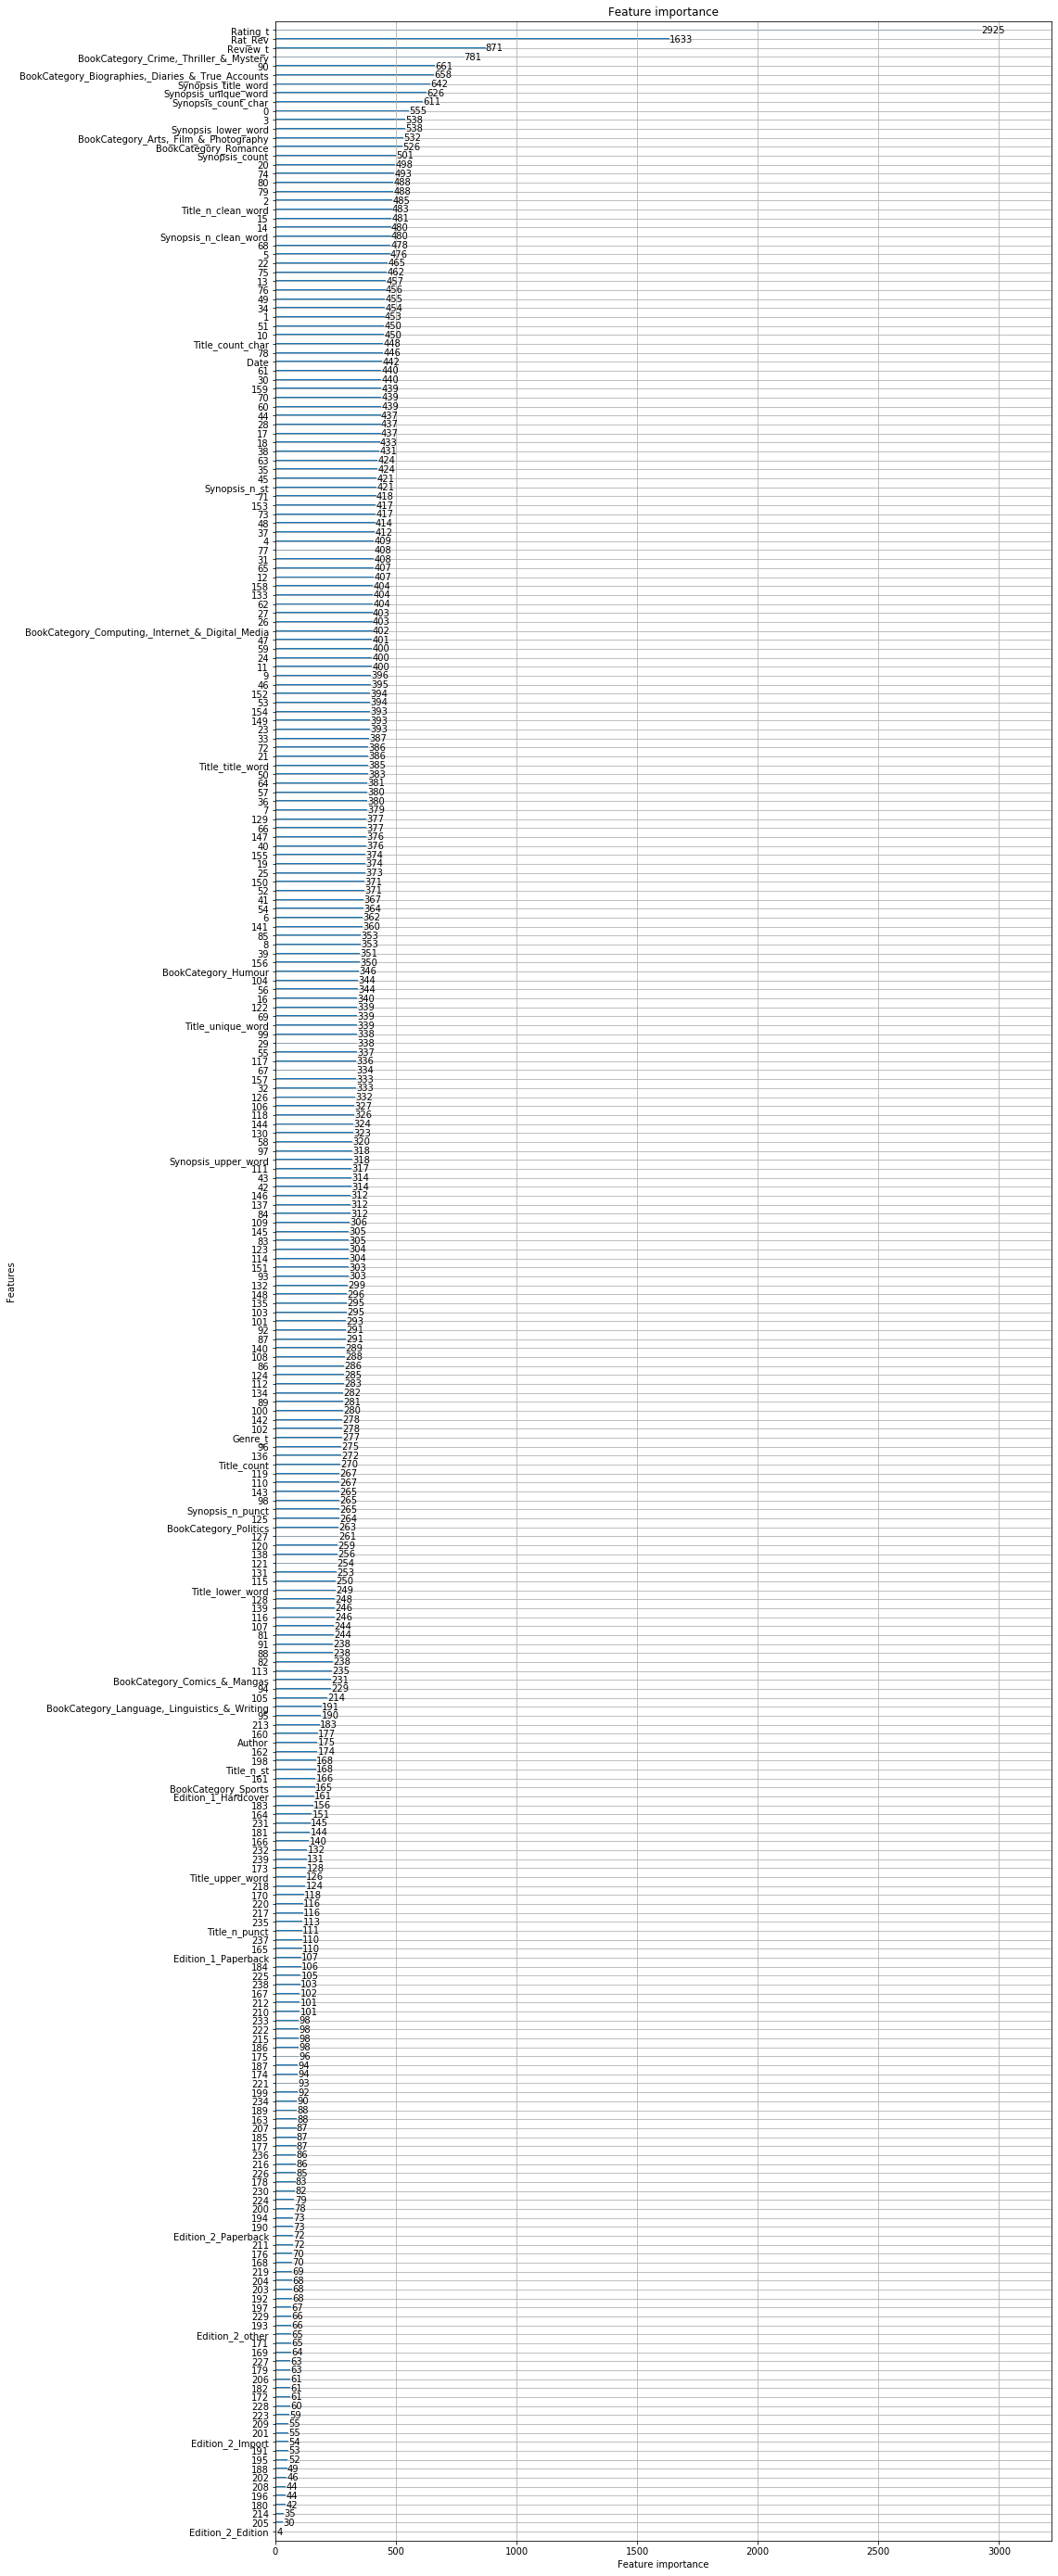

In [184]:
fig, ax  = plt.subplots(1,1, figsize=(15,50))
lgb.plot_importance(model, ax= ax)

In [185]:
test_lgb_1 = np.exp(test_lgb)-1
test_xgb_1 = np.exp(test_xgb)-1

In [286]:
answer1 = np.mean(test_xgb_1, axis = 1)

In [186]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [190]:
train_xgb_1 = np.exp(train_xgb)-1
train_lgb_1 = np.exp(train_lgb)-1

In [191]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=19)
rf.fit(pd.concat([train_lgb_1, train_xgb_1], axis = 1), np.exp(train_label)-1)
answer = rf.predict(pd.concat([test_lgb_1, test_xgb_1], axis = 1))

Wall time: 21.2 s


In [153]:
pd.DataFrame(answer)

,0
0,570.666713
1,977.774473
2,244.890153
3,964.940067
4,317.102660
...,...
1555,1725.302040
1556,180.042200
1557,620.672380
1558,288.765310


In [624]:
sample.Price = np.exp(answer)-1

In [187]:
sample.Price = answer1.values

In [192]:
sample.Price = answer

In [193]:
sample.to_excel('answer6.xlsx', index=False)

In [194]:
sample

,Price
0,658.323760
1,927.378173
2,348.306760
3,924.375080
4,386.032553
...,...
1555,1764.307920
1556,186.384460
1557,736.686520
1558,303.914080
